# Exploring the Impact of Chunk Size on Similarity Score Distribution 📊

In the context of the RAG system, determining the optimal chunk size is crucial yet challenging, as there is no one-size-fits-all solution. Choosing a larger chunk size risks diluting relevant information, potentially leading to less precise similarity scores. Conversely, opting for smaller chunks may risk fragmenting crucial information, resulting in incomplete representations and potentially lower-quality responses. 


This analysis aims to explore the trade-offs involved in selecting chunk sizes and understand their impact on similarity score distributions. By acknowledging these nuances, we can strive to strike a balance between granularity and coherence in our chunking strategy, ultimately enhancing the effectiveness of the RAG system in providing accurate and informative responses to user queries.

In [37]:
# Libraries import
import os
import warnings

from loguru import logger
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Modules import
from query_chatbot import load_database


In [4]:
# to display the plots in the notebook
%matplotlib inline

# to do not display the warnings
warnings.filterwarnings("ignore")

In [5]:
# Create a set of queries
queries_set = {
    "Qu'est ce qu'une fonction ?",
    "Quelle est la différence entre une liste et un set ?",
    "Comment itérer sur un dictionnaire ?",
    "Comment concaténer 2 chaines de caractères ?",
    "Trouve le maximum d'une liste.",
    "Comment utiliser une fonction lambda ?",
    "Dans quel cas utiliser une fonction récursive ?"
}

In [6]:
# Create a list of sizes
sizes_db = [200, 400, 600, 800, 1000, 1500, 2000, 3000]


In [7]:
# Load databases
databases = {}  # Create an empty dictionary to store the databases
databases_path = os.path.abspath(os.path.join(os.getcwd(), "..")) # Path to the databases

for size in sizes_db: 
    db_path = f"chroma_db_{size}" # Path to the database
    full_path = os.path.join(databases_path, db_path) # Full path to the database
    logger.info(f"Loading database with size: {size}...")
    databases[size] = load_database(full_path) # load the database and store it in the dictionary

2024-06-03 01:07:45.897 | INFO     | __main__:<module>:8 - Loading database with size: 200...
2024-06-03 01:07:45.899 | INFO     | query_chatbot:load_database:159 - Loading the vector database.
2024-06-03 01:07:48.037 | INFO     | query_chatbot:load_database:165 - Chunks in the database: 2531
2024-06-03 01:07:48.039 | SUCCESS  | query_chatbot:load_database:167 - Vector database prepared successfully.

2024-06-03 01:07:48.041 | INFO     | __main__:<module>:8 - Loading database with size: 400...
2024-06-03 01:07:48.042 | INFO     | query_chatbot:load_database:159 - Loading the vector database.
2024-06-03 01:07:48.103 | INFO     | query_chatbot:load_database:165 - Chunks in the database: 1993
2024-06-03 01:07:48.104 | SUCCESS  | query_chatbot:load_database:167 - Vector database prepared successfully.

2024-06-03 01:07:48.106 | INFO     | __main__:<module>:8 - Loading database with size: 600...
2024-06-03 01:07:48.107 | INFO     | query_chatbot:load_database:159 - Loading the vector databa

In [52]:
# Perform similarity search with relevance scores for each database
def save_relevance_scores_distribution(query: str, databases: dict, zoom: bool = False):
    """
    Function to plot the distribution of relevance scores for each chunk size.

    Parameters
    ----------
    query : str
        The query to perform similarity search on.
    databases : dict
        A dictionary containing the databases to perform similarity search on.
    zoom : bool, optional
        A boolean indicating whether to zoom in on the histogram or not, by default False.
    """
    # Create a subplot grid for each chunk size
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))

    for i, (size, (db, initial_chunks)) in enumerate(databases.items()):
        # Perform similarity search with relevance scores
        # maximize k to be sure to get all the results
        results = db.similarity_search_with_relevance_scores(query, k=6000)

        # Extract relevance scores from tuple (document, score) structure
        scores = [score for _doc, score in results]

        # Get the separation score for the top 10 chunks
        sorted_scores = sorted(scores, reverse=True)
        separation_score = sorted_scores[9]

        # Plot histogram of relevance scores
        row = i // 4
        col = i % 4
        axes[row, col].hist(scores, bins=30, alpha=0.7, color='blue')
        axes[row, col].set_xlim(-1, 1) # Set x-axis limits
        axes[row, col].set_title(f"Chunk Size : {size}")
        axes[row, col].set_xlabel('Relevance Scores') # Add x-axis labels
        axes[row, col].set_ylabel('Frequency') # Add y-axis label

        if zoom:
            axes[row, col].set_ylim(0, 30) # Set y-axis limits

        # Add legend indicating the initial number of chunks
        axes[row, col].text(0.05, 0.97, f"Chunks: {initial_chunks}", transform=axes[row, col].transAxes, fontsize=12,
                            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

        # Plot vertical line to separate top 10 chunks
        axes[row, col].axvline(x=separation_score, color='red', linestyle='--')

    # Add overall title for the plot
    plt.suptitle(f"{query}", y=0.96, fontsize=20)

    # Adjust vertical spacing between subplots
    plt.subplots_adjust(hspace=0.3)

    # Create the directory if it doesn't exist
    path = "../data/chunk_size_analysis"
    os.makedirs(path, exist_ok=True)

    # Save the plot as an image
    query = query.lower().replace(" ", "_")
    if zoom:
        file_name = f"distribution_{query}_zoom.png"
    else:
        file_name = f"distribution_{query}.png"
    save_path = os.path.join(path, file_name)
    plt.savefig(save_path)
    print(f"\033[92mPlot saved as {file_name}.\033[0m\n\n")


Performing similarity search for query: Qu'est ce qu'une fonction ?...


Number of requested results 6000 is greater than number of elements in index 2531, updating n_results = 2531
Number of requested results 6000 is greater than number of elements in index 1993, updating n_results = 1993
Number of requested results 6000 is greater than number of elements in index 1397, updating n_results = 1397
Number of requested results 6000 is greater than number of elements in index 1075, updating n_results = 1075
Number of requested results 6000 is greater than number of elements in index 890, updating n_results = 890
Number of requested results 6000 is greater than number of elements in index 658, updating n_results = 658
Number of requested results 6000 is greater than number of elements in index 549, updating n_results = 549
Number of requested results 6000 is greater than number of elements in index 459, updating n_results = 459


Plot saved as distribution_qu'est_ce_qu'une_fonction_?.png.


Performing similarity search for query: Comment concaténer 2 chaines de caractères ?...


Number of requested results 6000 is greater than number of elements in index 2531, updating n_results = 2531
Number of requested results 6000 is greater than number of elements in index 1993, updating n_results = 1993
Number of requested results 6000 is greater than number of elements in index 1397, updating n_results = 1397
Number of requested results 6000 is greater than number of elements in index 1075, updating n_results = 1075
Number of requested results 6000 is greater than number of elements in index 890, updating n_results = 890
Number of requested results 6000 is greater than number of elements in index 658, updating n_results = 658
Number of requested results 6000 is greater than number of elements in index 549, updating n_results = 549
Number of requested results 6000 is greater than number of elements in index 459, updating n_results = 459


Plot saved as distribution_comment_concaténer_2_chaines_de_caractères_?.png.


Performing similarity search for query: Dans quel cas utiliser une fonction récursive ?...


Number of requested results 6000 is greater than number of elements in index 2531, updating n_results = 2531
Number of requested results 6000 is greater than number of elements in index 1993, updating n_results = 1993
Number of requested results 6000 is greater than number of elements in index 1397, updating n_results = 1397
Number of requested results 6000 is greater than number of elements in index 1075, updating n_results = 1075
Number of requested results 6000 is greater than number of elements in index 890, updating n_results = 890
Number of requested results 6000 is greater than number of elements in index 658, updating n_results = 658
Number of requested results 6000 is greater than number of elements in index 549, updating n_results = 549
Number of requested results 6000 is greater than number of elements in index 459, updating n_results = 459


Plot saved as distribution_dans_quel_cas_utiliser_une_fonction_récursive_?.png.


Performing similarity search for query: Quelle est la différence entre une liste et un set ?...


Number of requested results 6000 is greater than number of elements in index 2531, updating n_results = 2531
Number of requested results 6000 is greater than number of elements in index 1993, updating n_results = 1993
Number of requested results 6000 is greater than number of elements in index 1397, updating n_results = 1397
Number of requested results 6000 is greater than number of elements in index 1075, updating n_results = 1075
Number of requested results 6000 is greater than number of elements in index 890, updating n_results = 890
Number of requested results 6000 is greater than number of elements in index 658, updating n_results = 658
Number of requested results 6000 is greater than number of elements in index 549, updating n_results = 549
Number of requested results 6000 is greater than number of elements in index 459, updating n_results = 459


Plot saved as distribution_quelle_est_la_différence_entre_une_liste_et_un_set_?.png.


Performing similarity search for query: Comment utiliser une fonction lambda ?...


Number of requested results 6000 is greater than number of elements in index 2531, updating n_results = 2531
Number of requested results 6000 is greater than number of elements in index 1993, updating n_results = 1993
Number of requested results 6000 is greater than number of elements in index 1397, updating n_results = 1397
Number of requested results 6000 is greater than number of elements in index 1075, updating n_results = 1075
Number of requested results 6000 is greater than number of elements in index 890, updating n_results = 890
Number of requested results 6000 is greater than number of elements in index 658, updating n_results = 658
Number of requested results 6000 is greater than number of elements in index 549, updating n_results = 549
Number of requested results 6000 is greater than number of elements in index 459, updating n_results = 459


Plot saved as distribution_comment_utiliser_une_fonction_lambda_?.png.


Performing similarity search for query: Trouve le maximum d'une liste....


Number of requested results 6000 is greater than number of elements in index 2531, updating n_results = 2531
Number of requested results 6000 is greater than number of elements in index 1993, updating n_results = 1993
Number of requested results 6000 is greater than number of elements in index 1397, updating n_results = 1397
Number of requested results 6000 is greater than number of elements in index 1075, updating n_results = 1075
Number of requested results 6000 is greater than number of elements in index 890, updating n_results = 890
Number of requested results 6000 is greater than number of elements in index 658, updating n_results = 658
Number of requested results 6000 is greater than number of elements in index 549, updating n_results = 549
Number of requested results 6000 is greater than number of elements in index 459, updating n_results = 459


Plot saved as distribution_trouve_le_maximum_d'une_liste..png.


Performing similarity search for query: Comment itérer sur un dictionnaire ?...


Number of requested results 6000 is greater than number of elements in index 2531, updating n_results = 2531
Number of requested results 6000 is greater than number of elements in index 1993, updating n_results = 1993
Number of requested results 6000 is greater than number of elements in index 1397, updating n_results = 1397
Number of requested results 6000 is greater than number of elements in index 1075, updating n_results = 1075
Number of requested results 6000 is greater than number of elements in index 890, updating n_results = 890
Number of requested results 6000 is greater than number of elements in index 658, updating n_results = 658
Number of requested results 6000 is greater than number of elements in index 549, updating n_results = 549
Number of requested results 6000 is greater than number of elements in index 459, updating n_results = 459


Plot saved as distribution_comment_itérer_sur_un_dictionnaire_?.png.




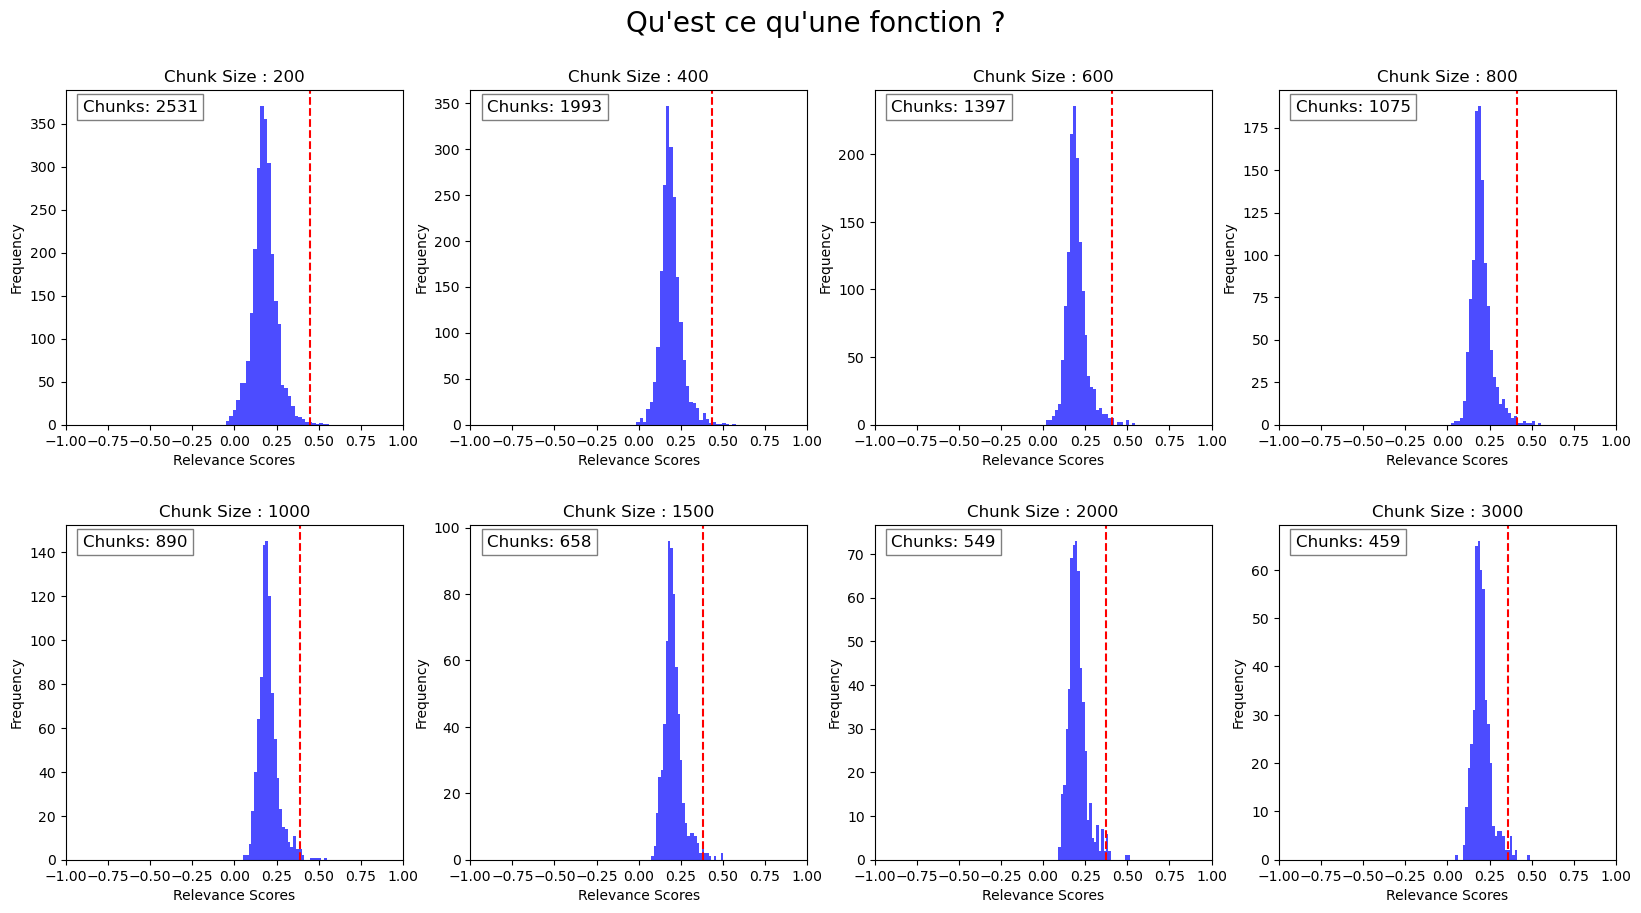

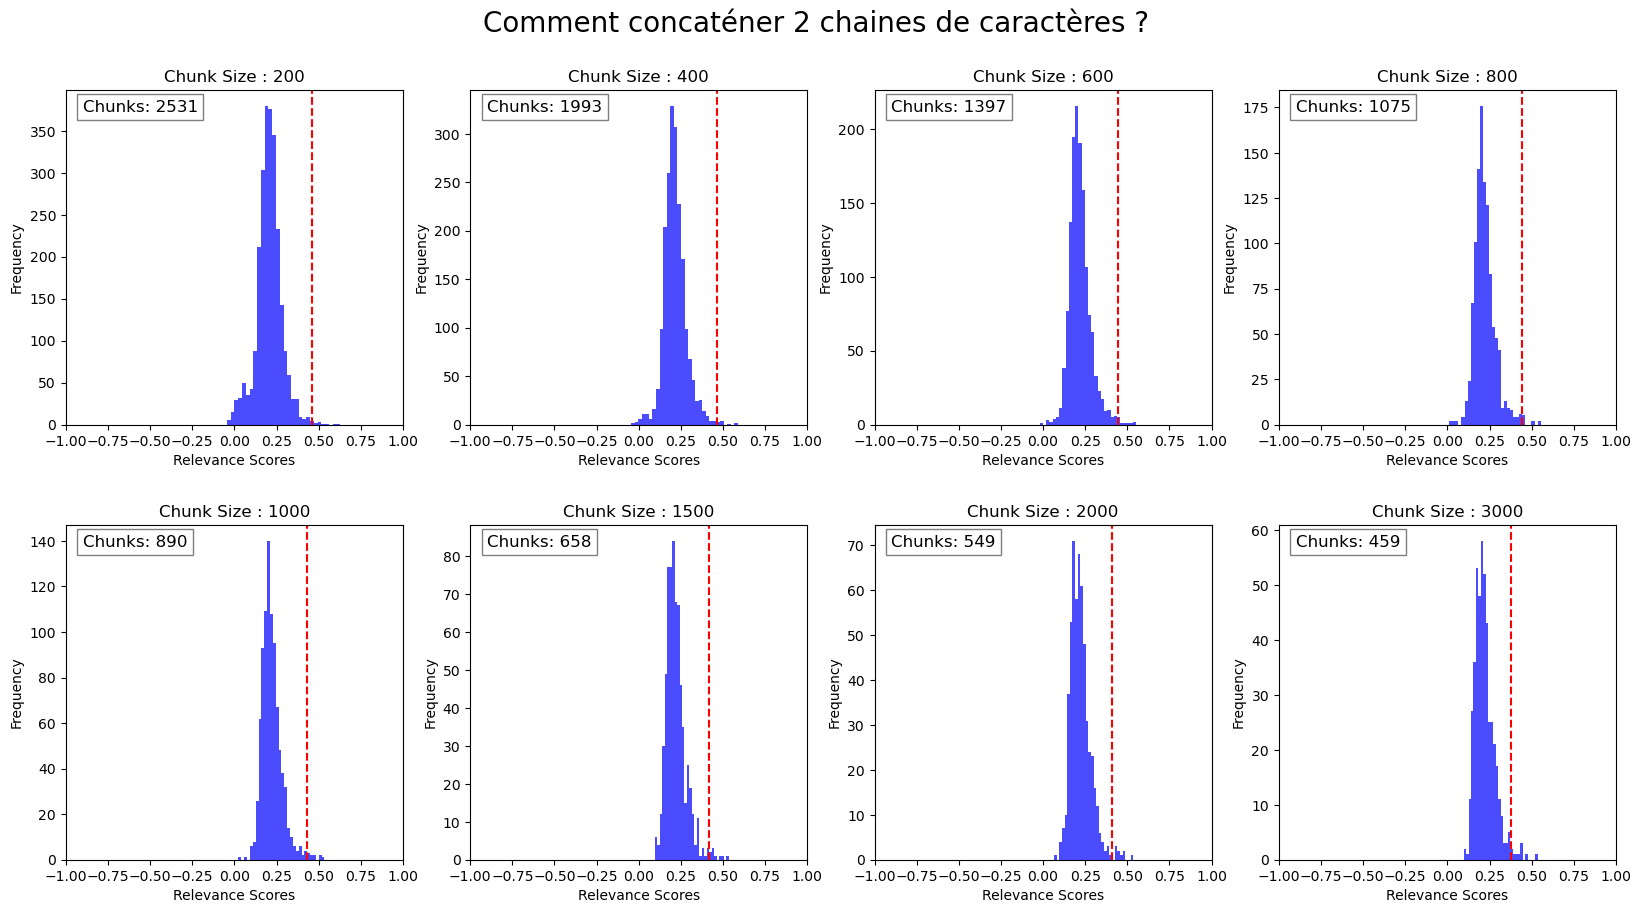

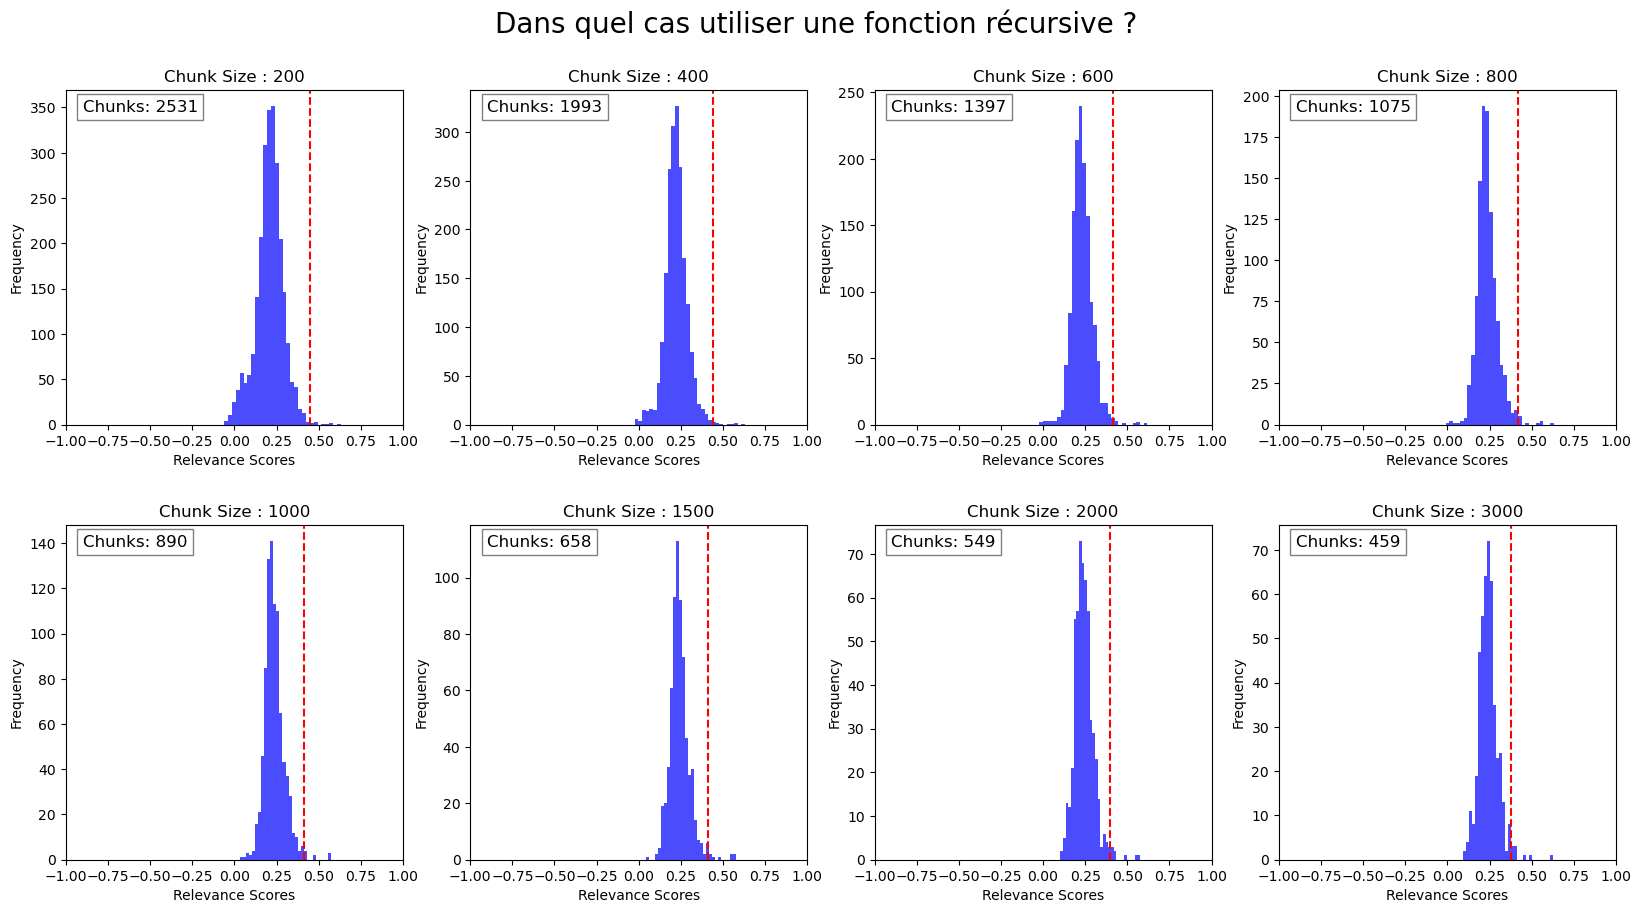

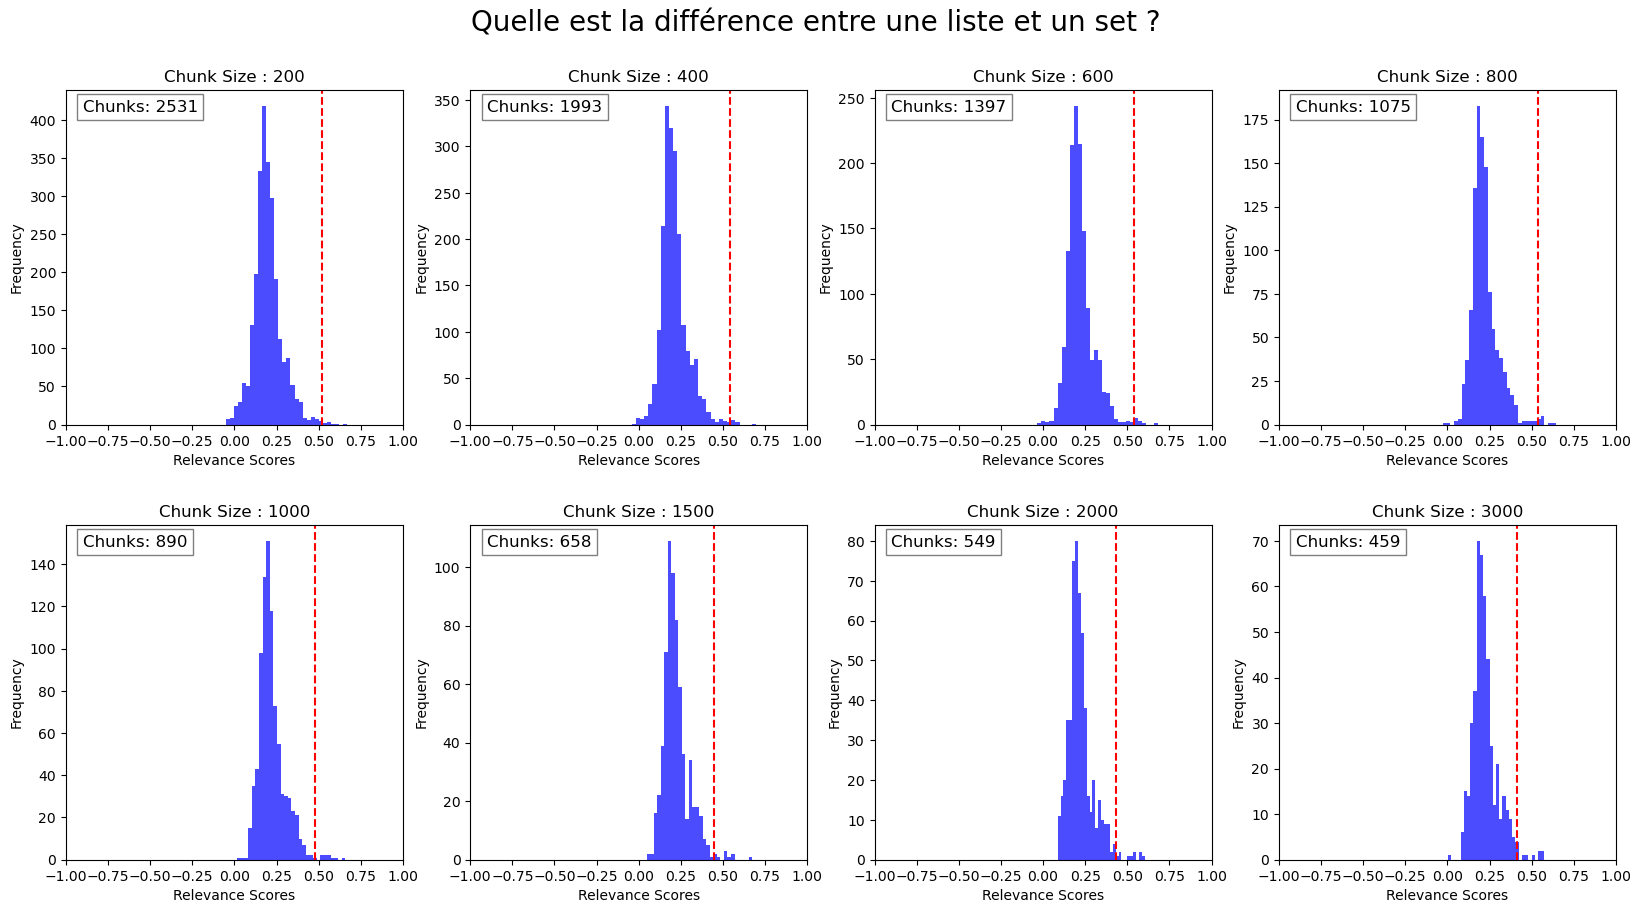

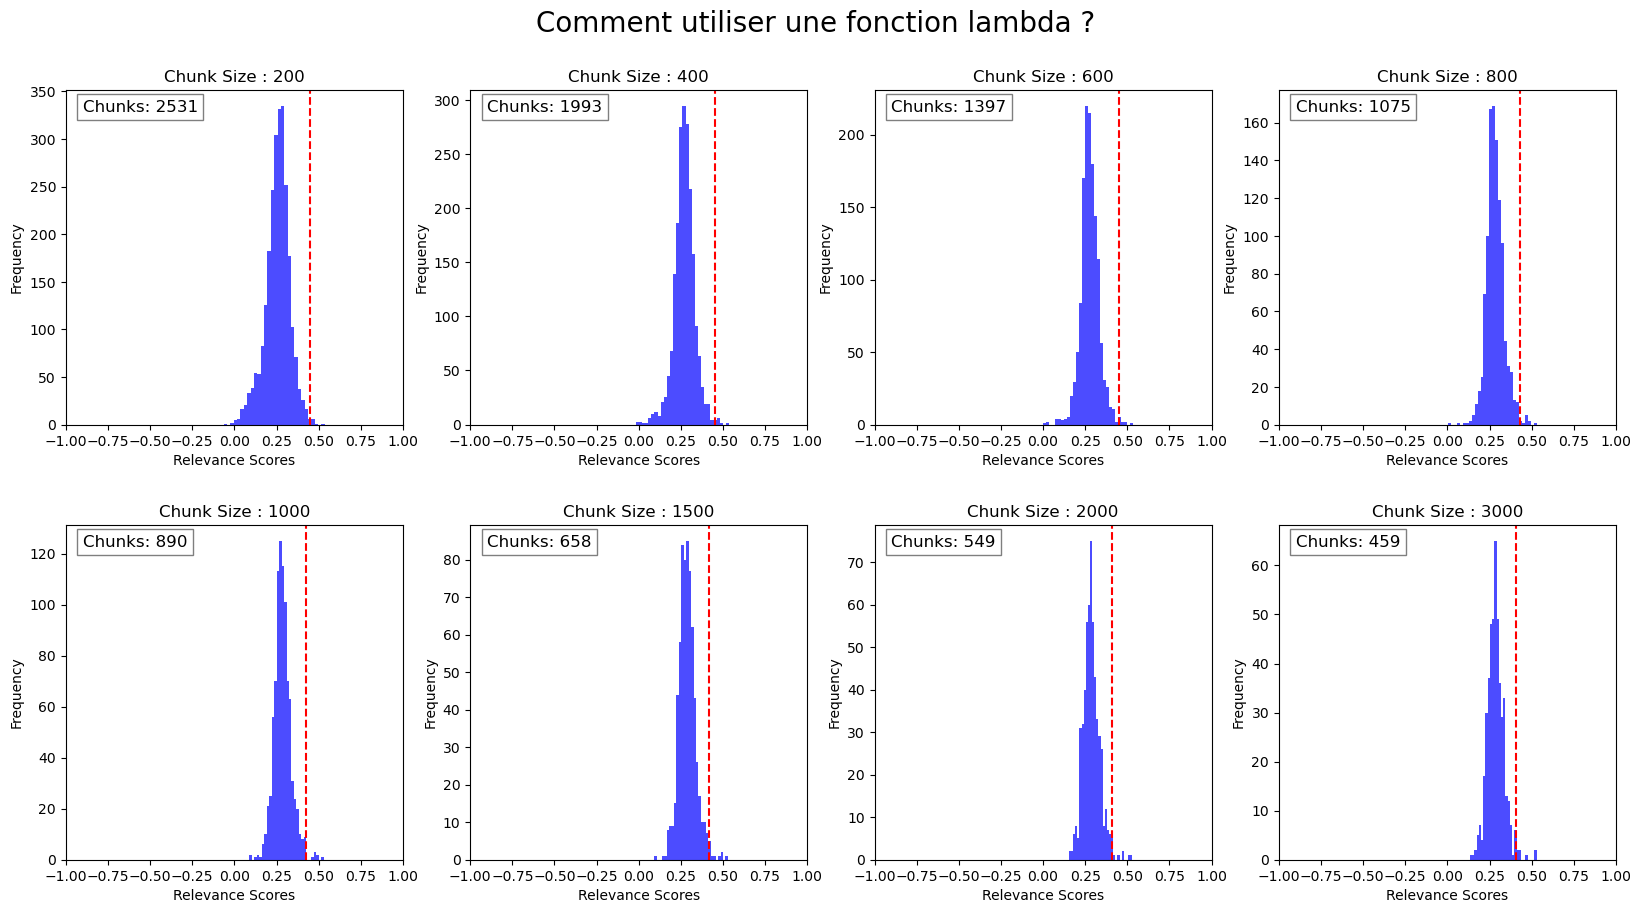

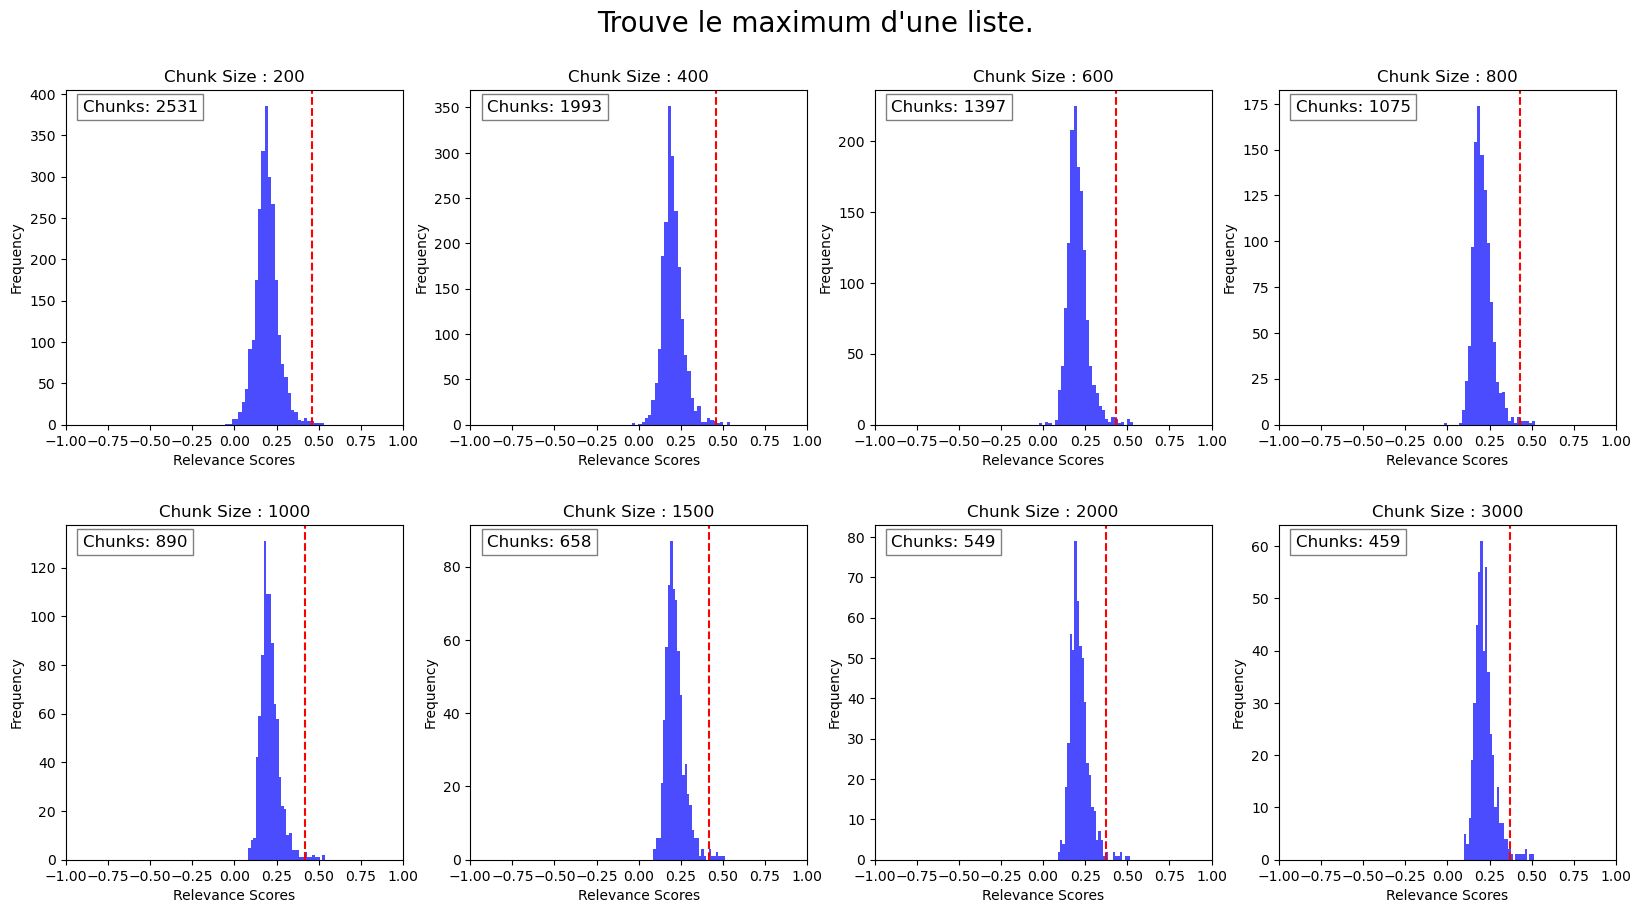

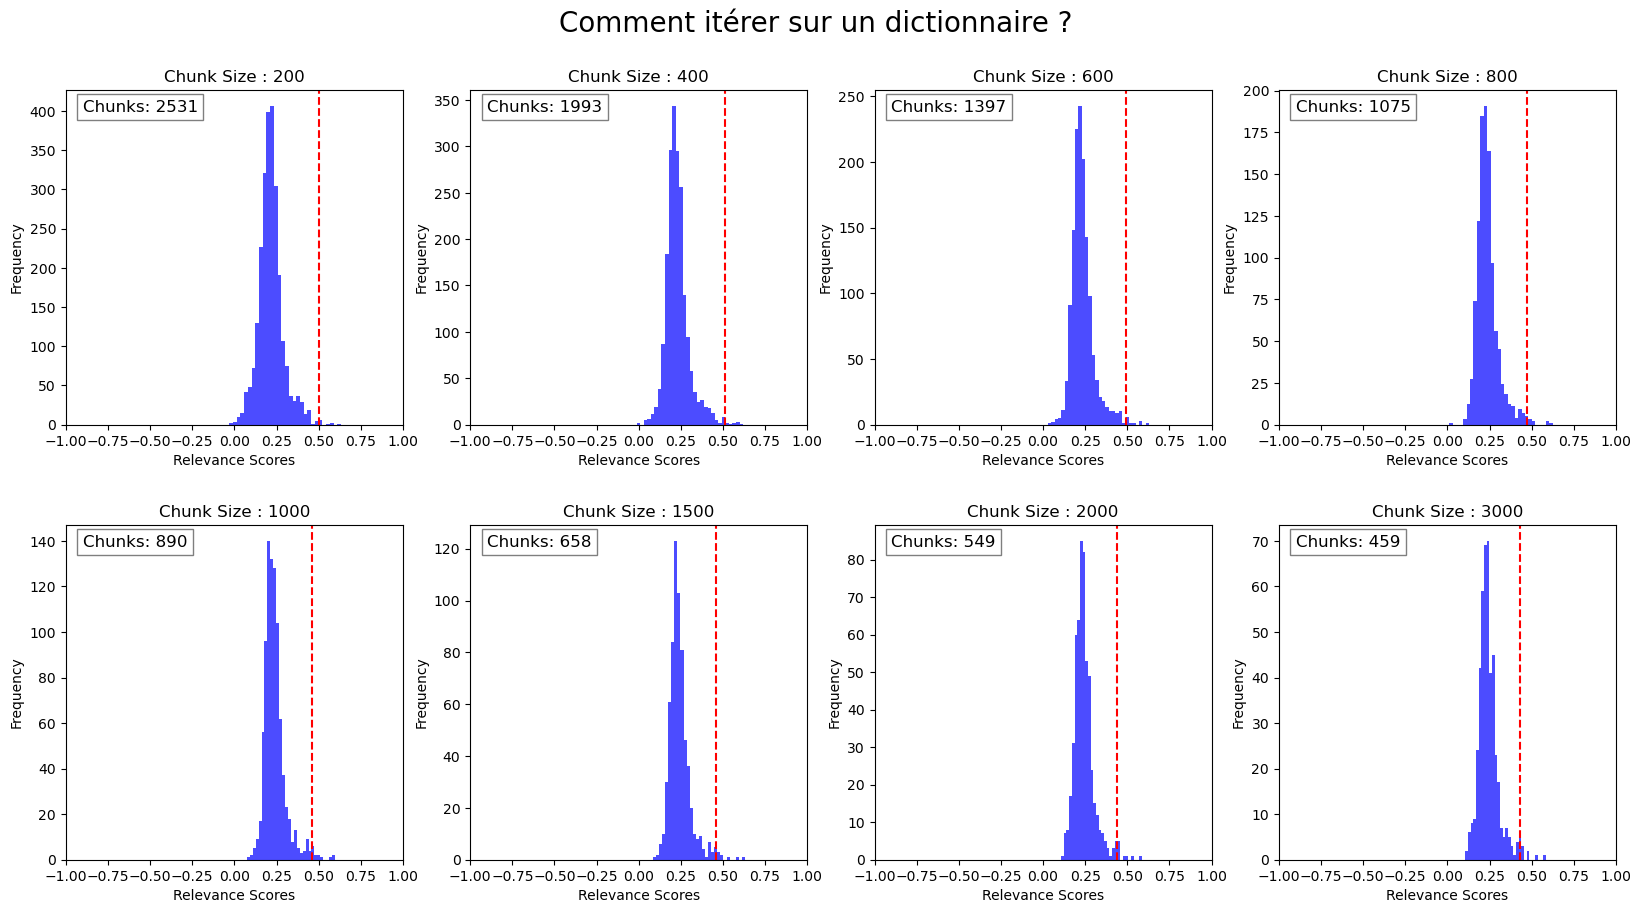

In [53]:
# Perform similarity search with relevance scores for each query
for query in queries_set:
    print(f"Performing similarity search for query: {query}...")
    save_relevance_scores_distribution(query, databases, zoom=False)

We observe that larger chunk sizes result in more pronounced distinctions between the top 10 scores and the rest. However, it's important to note that the scale of the y-axis depends on the number of chunks, which could bias our observations. To mitigate this, we will zoom in by setting a limit of 100 for the frequency.

Performing similarity search for query: Qu'est ce qu'une fonction ?...


Number of requested results 6000 is greater than number of elements in index 2531, updating n_results = 2531
Number of requested results 6000 is greater than number of elements in index 1993, updating n_results = 1993
Number of requested results 6000 is greater than number of elements in index 1397, updating n_results = 1397
Number of requested results 6000 is greater than number of elements in index 1075, updating n_results = 1075
Number of requested results 6000 is greater than number of elements in index 890, updating n_results = 890
Number of requested results 6000 is greater than number of elements in index 658, updating n_results = 658
Number of requested results 6000 is greater than number of elements in index 549, updating n_results = 549
Number of requested results 6000 is greater than number of elements in index 459, updating n_results = 459


Plot saved as distribution_qu'est_ce_qu'une_fonction_?_zoom.png.


Performing similarity search for query: Comment concaténer 2 chaines de caractères ?...


Number of requested results 6000 is greater than number of elements in index 2531, updating n_results = 2531
Number of requested results 6000 is greater than number of elements in index 1993, updating n_results = 1993
Number of requested results 6000 is greater than number of elements in index 1397, updating n_results = 1397
Number of requested results 6000 is greater than number of elements in index 1075, updating n_results = 1075
Number of requested results 6000 is greater than number of elements in index 890, updating n_results = 890
Number of requested results 6000 is greater than number of elements in index 658, updating n_results = 658
Number of requested results 6000 is greater than number of elements in index 549, updating n_results = 549
Number of requested results 6000 is greater than number of elements in index 459, updating n_results = 459


Plot saved as distribution_comment_concaténer_2_chaines_de_caractères_?_zoom.png.


Performing similarity search for query: Dans quel cas utiliser une fonction récursive ?...


Number of requested results 6000 is greater than number of elements in index 2531, updating n_results = 2531
Number of requested results 6000 is greater than number of elements in index 1993, updating n_results = 1993
Number of requested results 6000 is greater than number of elements in index 1397, updating n_results = 1397
Number of requested results 6000 is greater than number of elements in index 1075, updating n_results = 1075
Number of requested results 6000 is greater than number of elements in index 890, updating n_results = 890
Number of requested results 6000 is greater than number of elements in index 658, updating n_results = 658
Number of requested results 6000 is greater than number of elements in index 549, updating n_results = 549
Number of requested results 6000 is greater than number of elements in index 459, updating n_results = 459


Plot saved as distribution_dans_quel_cas_utiliser_une_fonction_récursive_?_zoom.png.


Performing similarity search for query: Quelle est la différence entre une liste et un set ?...


Number of requested results 6000 is greater than number of elements in index 2531, updating n_results = 2531
Number of requested results 6000 is greater than number of elements in index 1993, updating n_results = 1993
Number of requested results 6000 is greater than number of elements in index 1397, updating n_results = 1397
Number of requested results 6000 is greater than number of elements in index 1075, updating n_results = 1075
Number of requested results 6000 is greater than number of elements in index 890, updating n_results = 890
Number of requested results 6000 is greater than number of elements in index 658, updating n_results = 658
Number of requested results 6000 is greater than number of elements in index 549, updating n_results = 549
Number of requested results 6000 is greater than number of elements in index 459, updating n_results = 459


Plot saved as distribution_quelle_est_la_différence_entre_une_liste_et_un_set_?_zoom.png.


Performing similarity search for query: Comment utiliser une fonction lambda ?...


Number of requested results 6000 is greater than number of elements in index 2531, updating n_results = 2531
Number of requested results 6000 is greater than number of elements in index 1993, updating n_results = 1993
Number of requested results 6000 is greater than number of elements in index 1397, updating n_results = 1397
Number of requested results 6000 is greater than number of elements in index 1075, updating n_results = 1075
Number of requested results 6000 is greater than number of elements in index 890, updating n_results = 890
Number of requested results 6000 is greater than number of elements in index 658, updating n_results = 658
Number of requested results 6000 is greater than number of elements in index 549, updating n_results = 549
Number of requested results 6000 is greater than number of elements in index 459, updating n_results = 459


Plot saved as distribution_comment_utiliser_une_fonction_lambda_?_zoom.png.


Performing similarity search for query: Trouve le maximum d'une liste....


Number of requested results 6000 is greater than number of elements in index 2531, updating n_results = 2531
Number of requested results 6000 is greater than number of elements in index 1993, updating n_results = 1993
Number of requested results 6000 is greater than number of elements in index 1397, updating n_results = 1397
Number of requested results 6000 is greater than number of elements in index 1075, updating n_results = 1075
Number of requested results 6000 is greater than number of elements in index 890, updating n_results = 890
Number of requested results 6000 is greater than number of elements in index 658, updating n_results = 658
Number of requested results 6000 is greater than number of elements in index 549, updating n_results = 549
Number of requested results 6000 is greater than number of elements in index 459, updating n_results = 459


Plot saved as distribution_trouve_le_maximum_d'une_liste._zoom.png.


Performing similarity search for query: Comment itérer sur un dictionnaire ?...


Number of requested results 6000 is greater than number of elements in index 2531, updating n_results = 2531
Number of requested results 6000 is greater than number of elements in index 1993, updating n_results = 1993
Number of requested results 6000 is greater than number of elements in index 1397, updating n_results = 1397
Number of requested results 6000 is greater than number of elements in index 1075, updating n_results = 1075
Number of requested results 6000 is greater than number of elements in index 890, updating n_results = 890
Number of requested results 6000 is greater than number of elements in index 658, updating n_results = 658
Number of requested results 6000 is greater than number of elements in index 549, updating n_results = 549
Number of requested results 6000 is greater than number of elements in index 459, updating n_results = 459


Plot saved as distribution_comment_itérer_sur_un_dictionnaire_?_zoom.png.




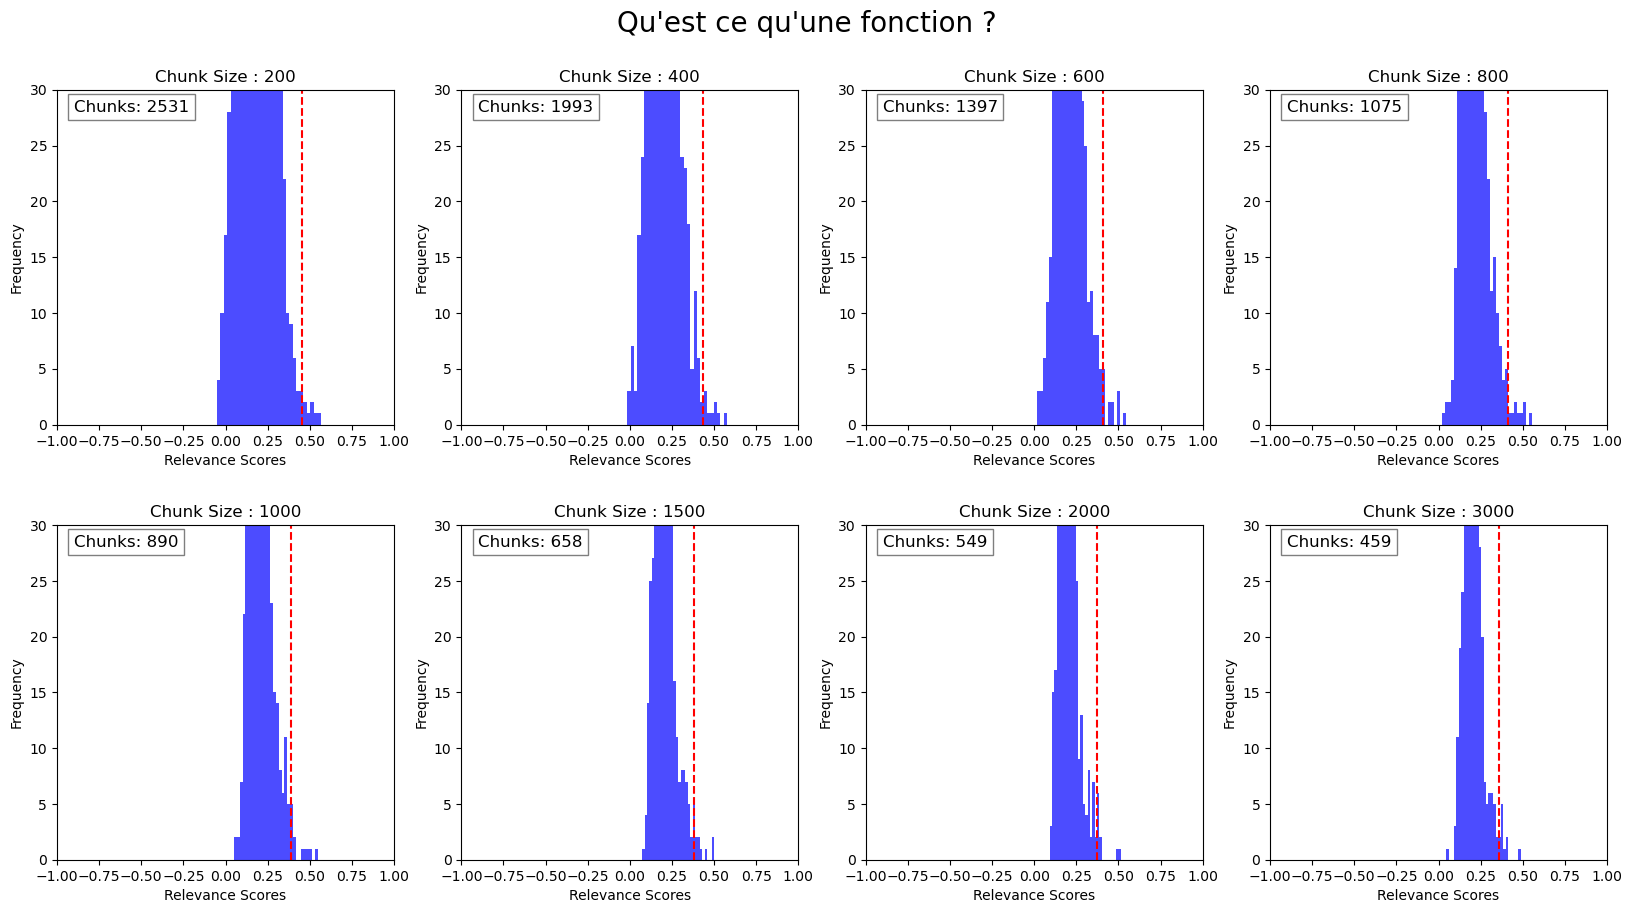

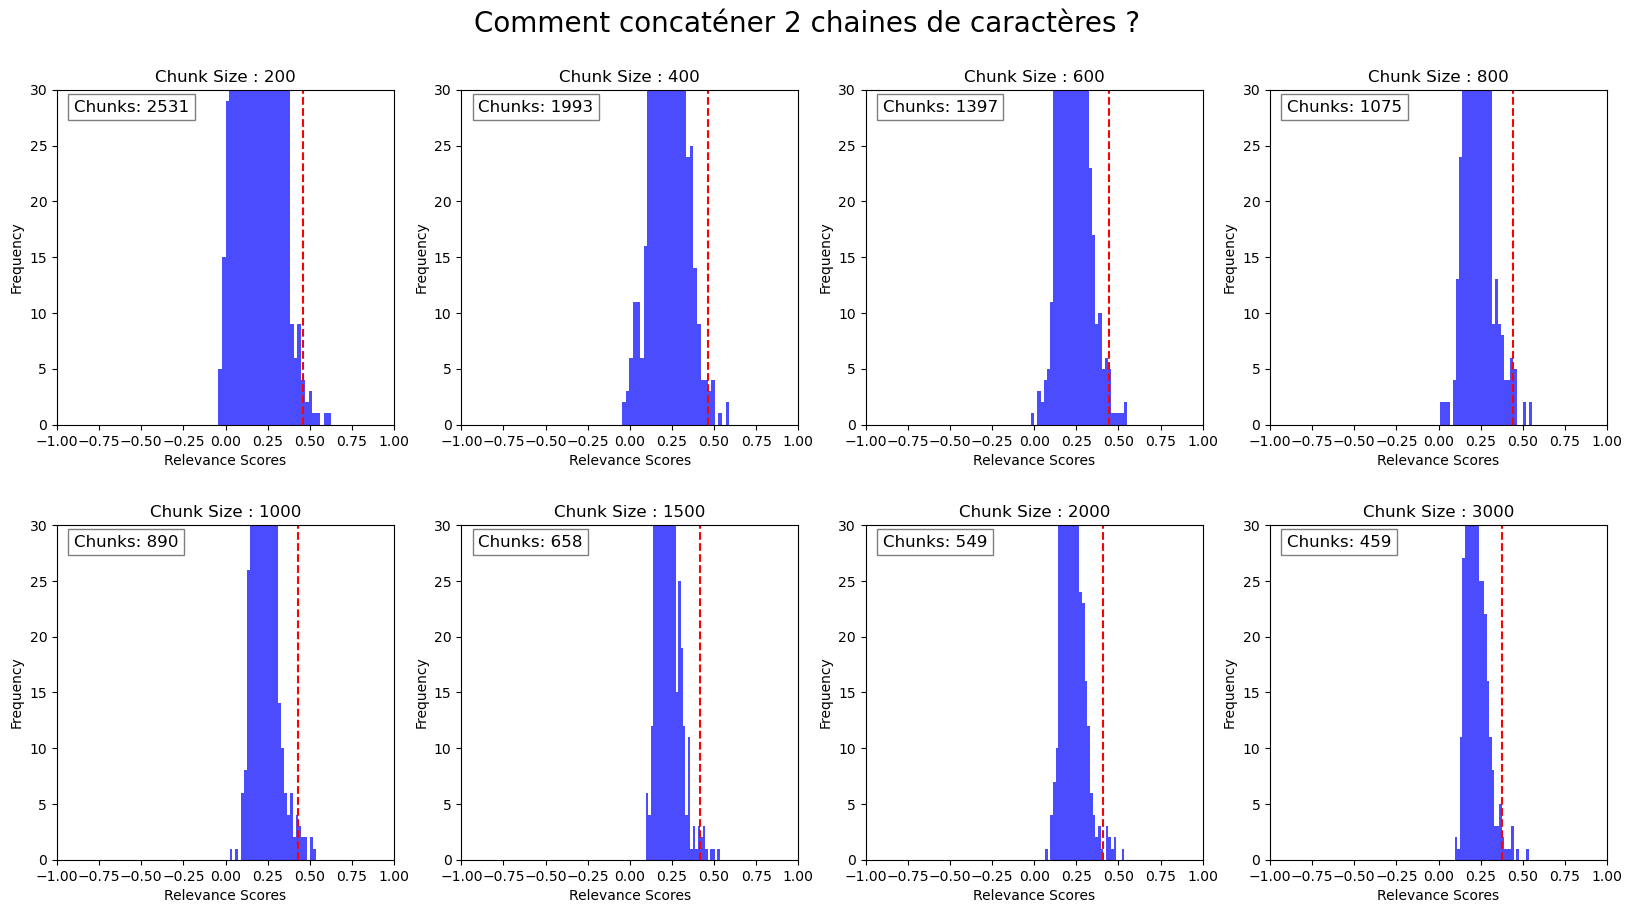

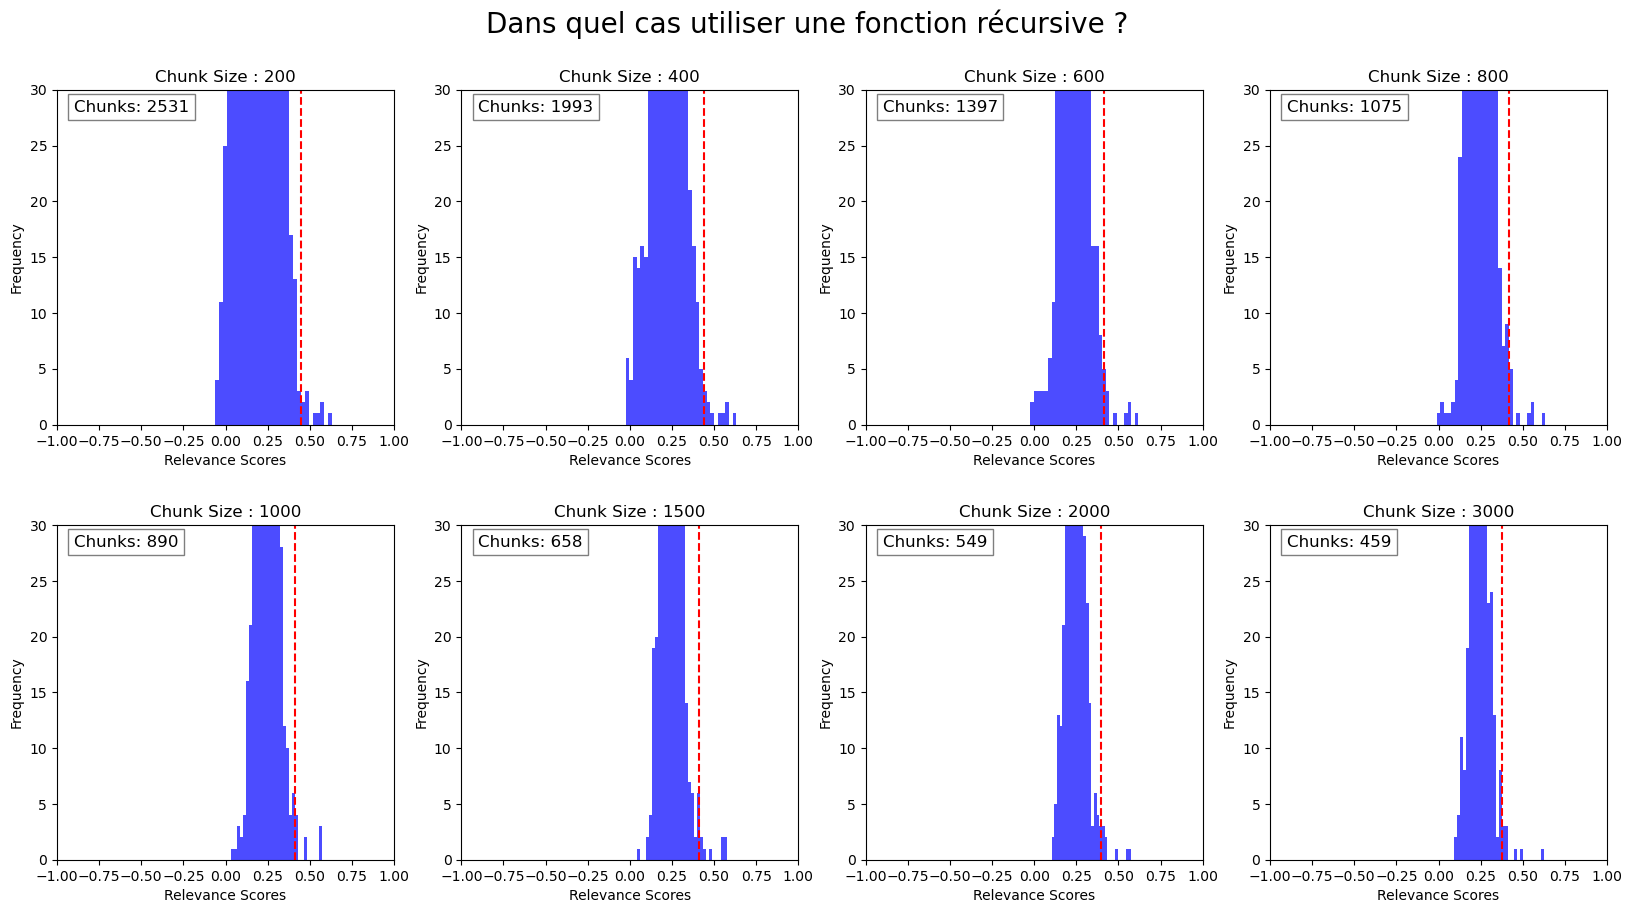

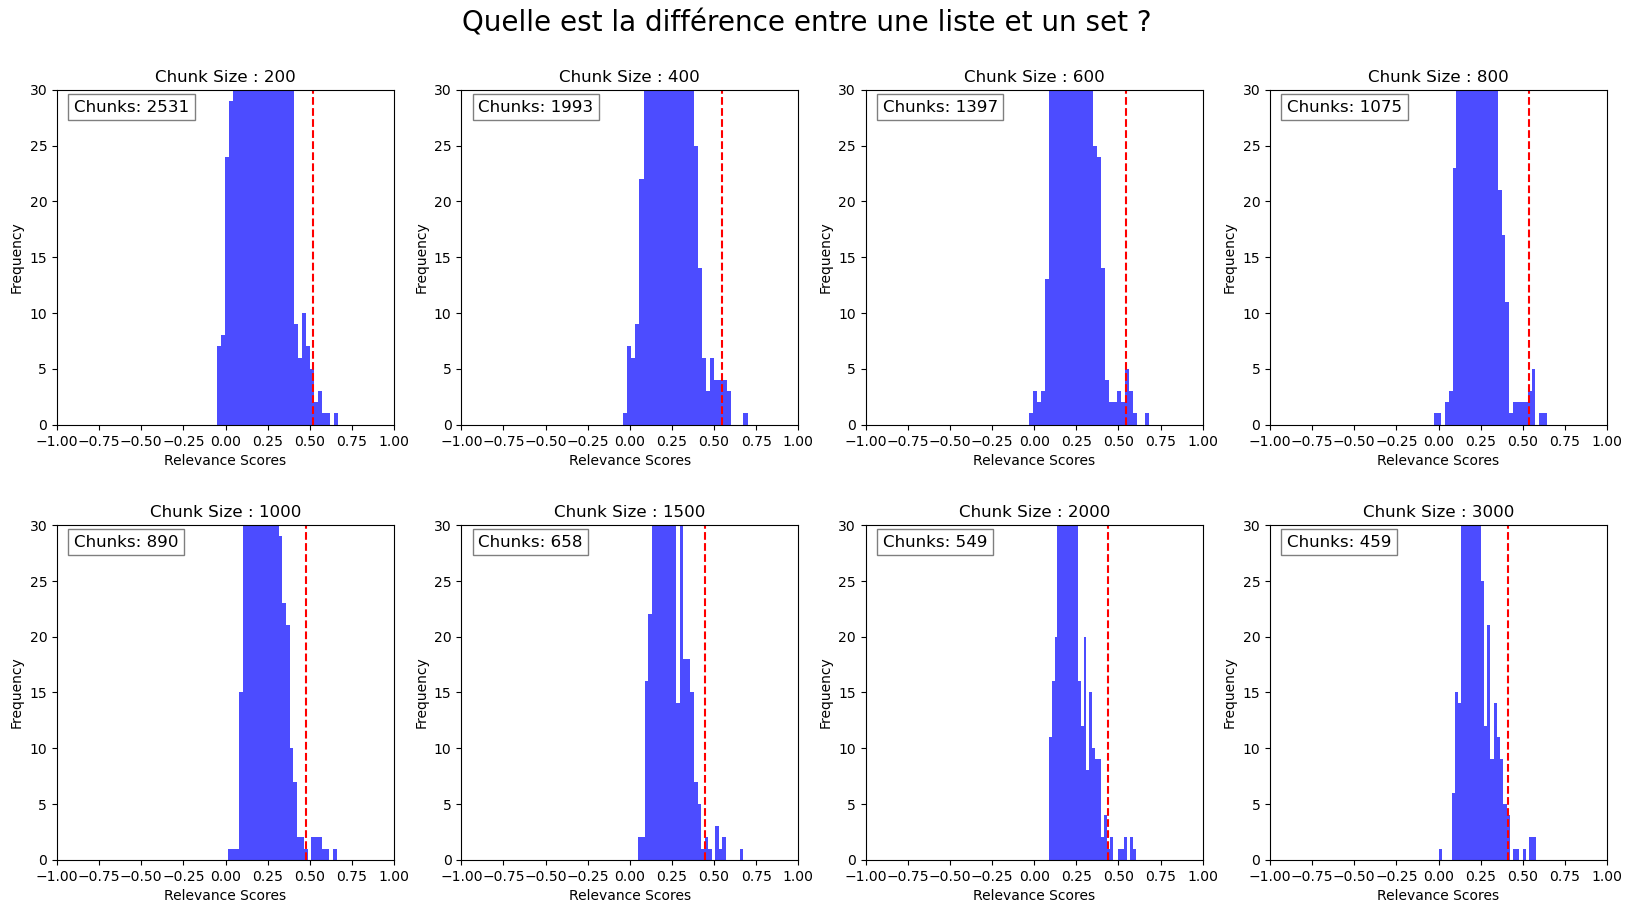

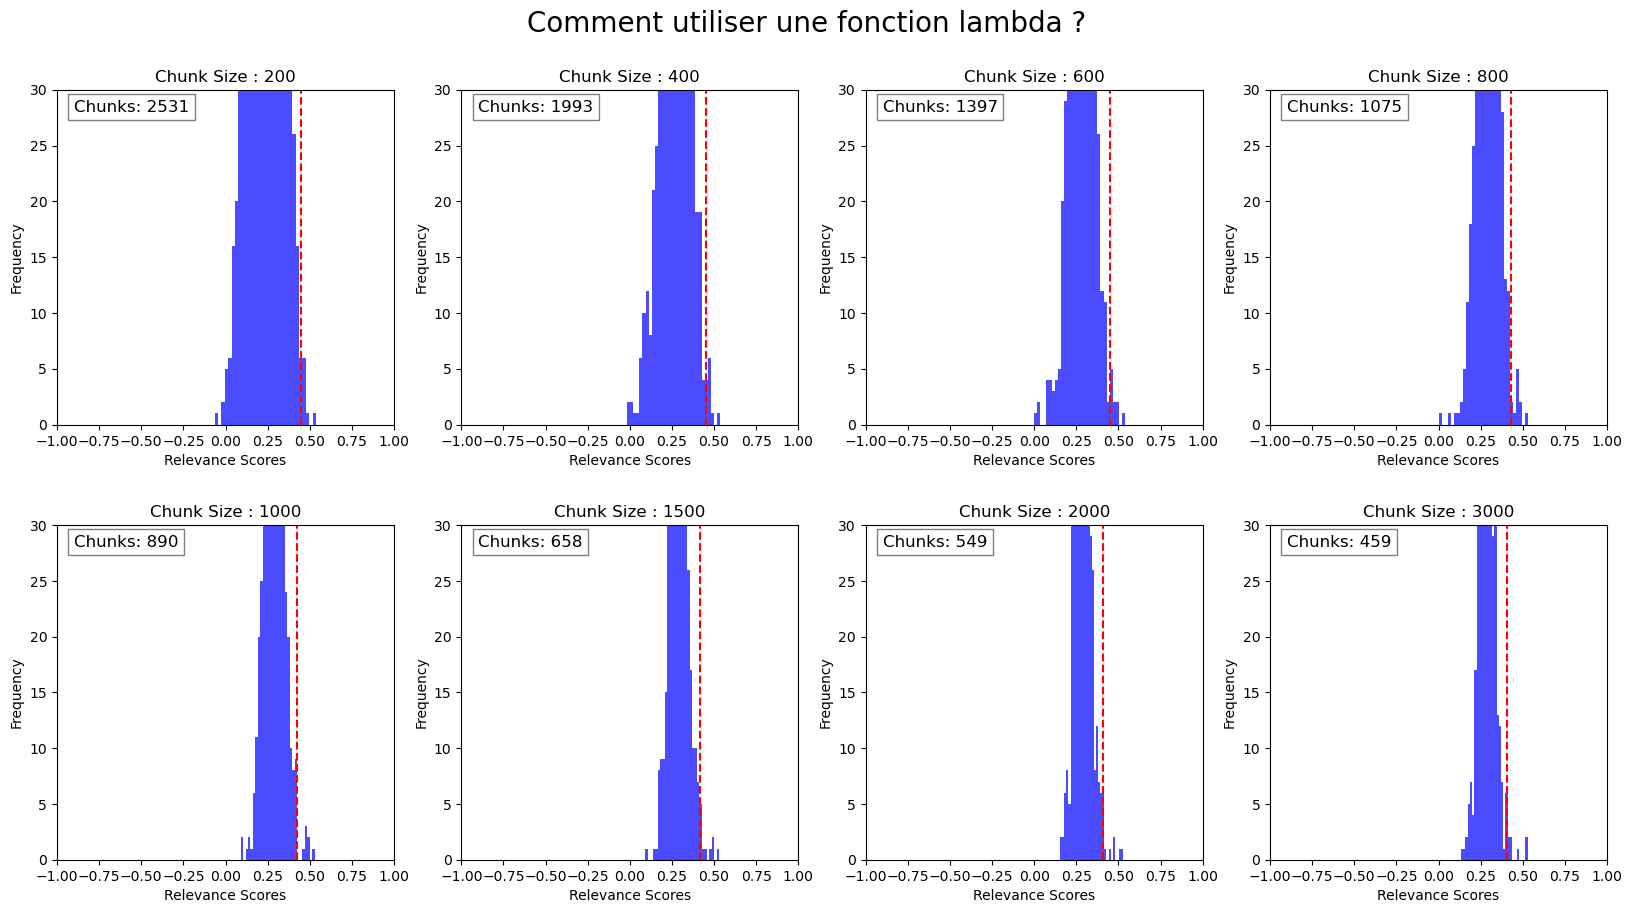

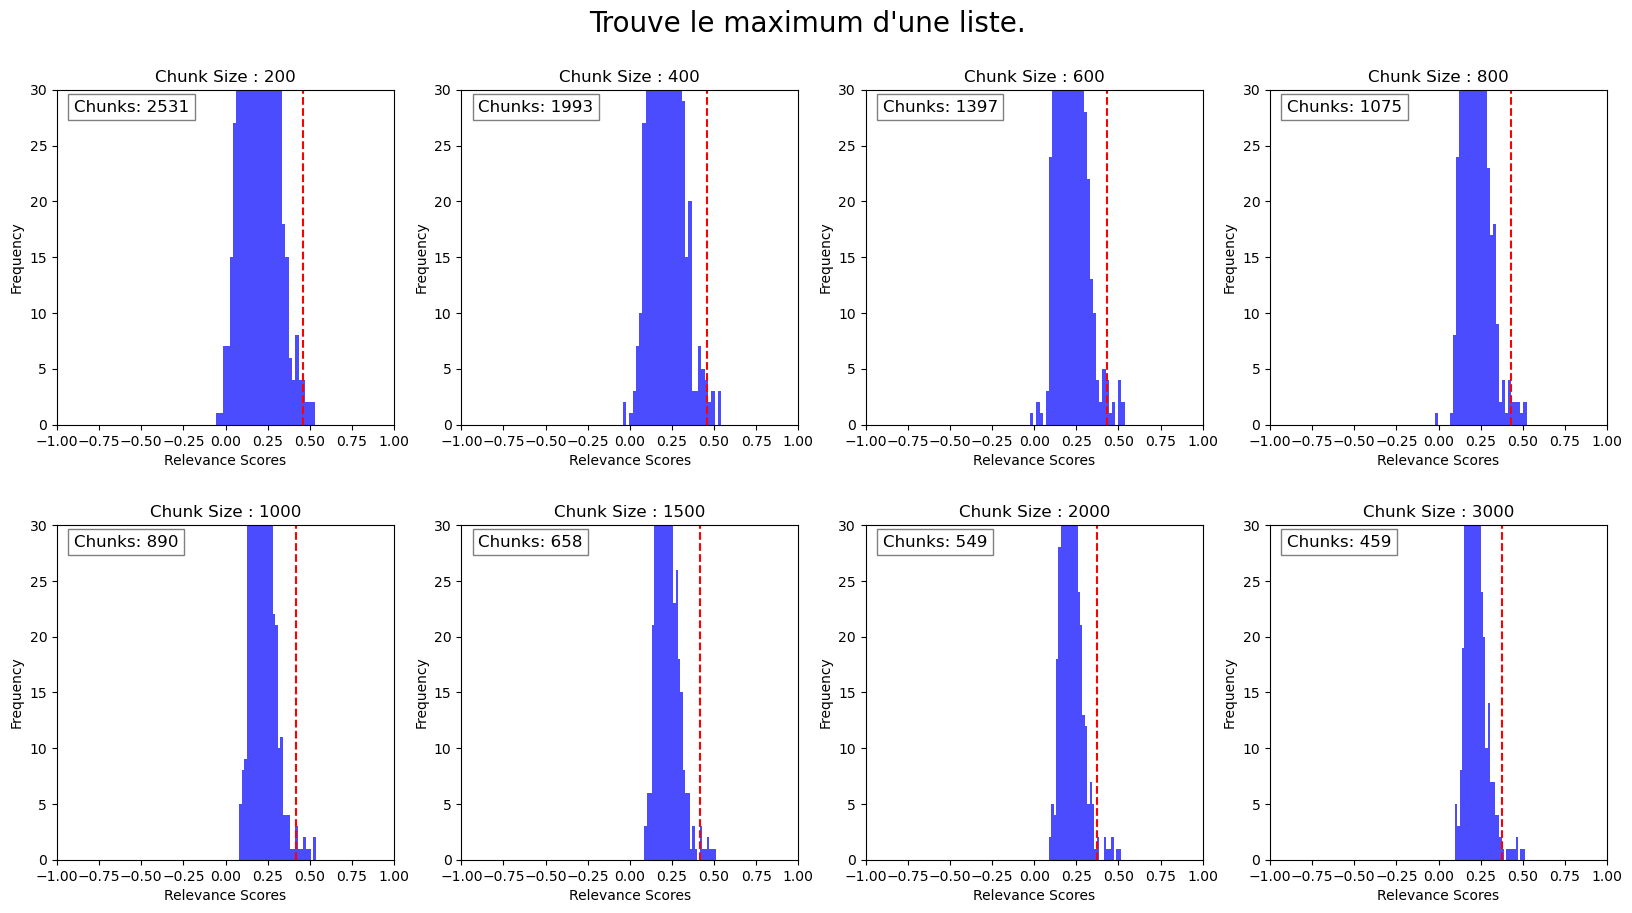

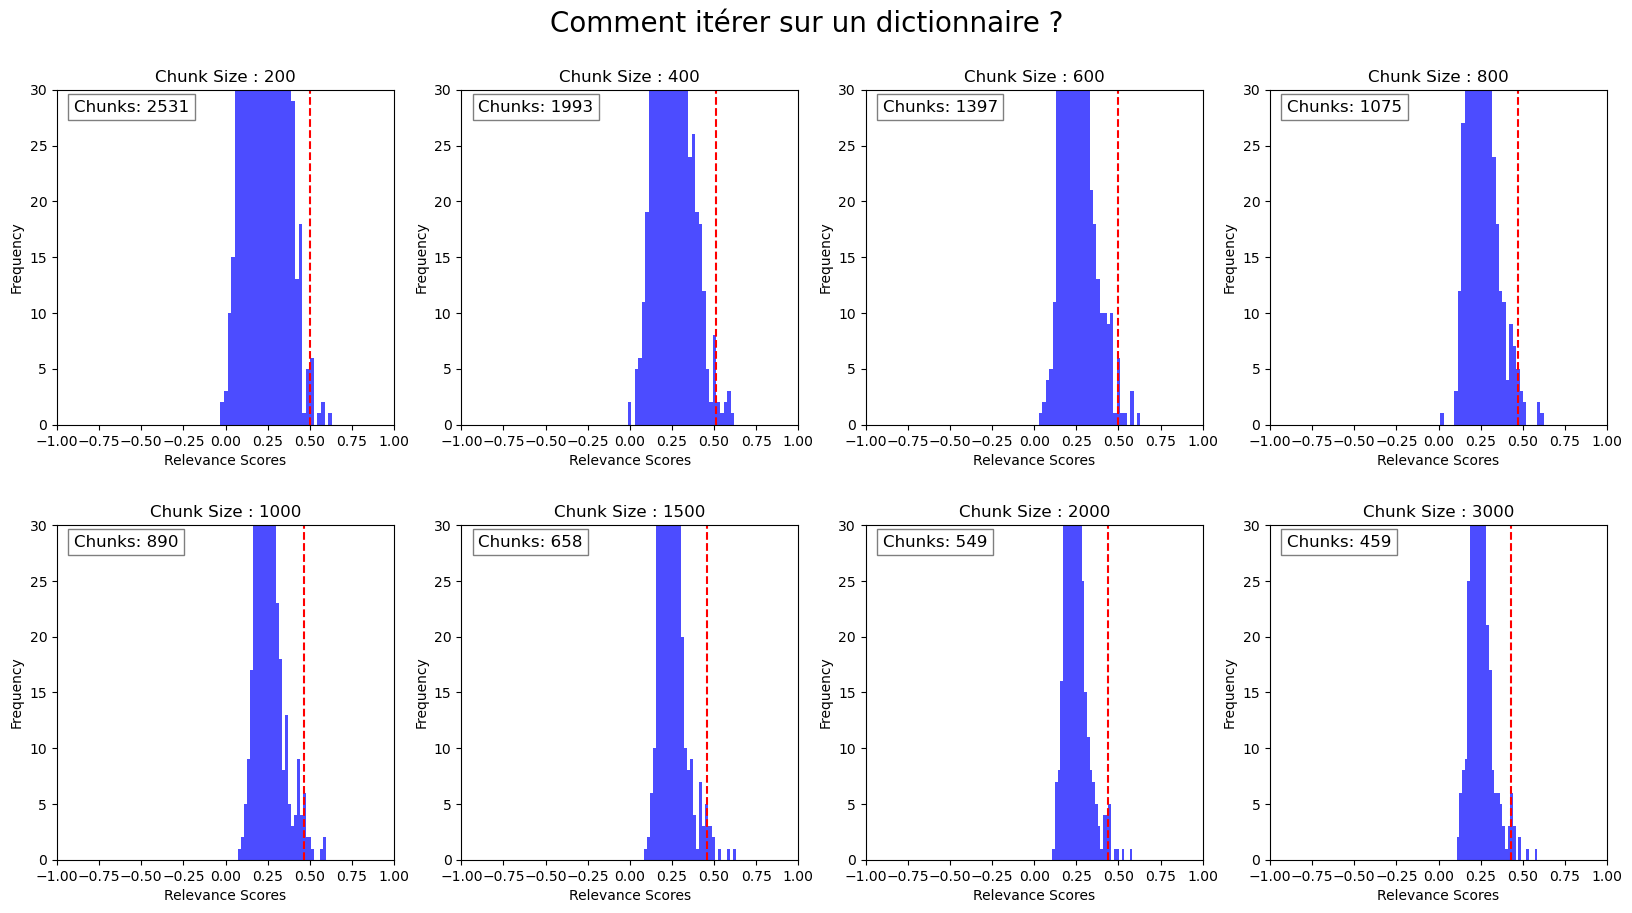

In [54]:
# Perform similarity search with relevance scores for each query
for query in queries_set:
    print(f"Performing similarity search for query: {query}...")
    save_relevance_scores_distribution(query, databases, zoom=True)

With the zoom applied, we can clearly observe that there is no significant difference in the distribution of similarity scores across different chunk sizes. This suggests that the choice of chunk size may not have a substantial impact on the similarity score distribution. However, it is essential to consider other factors such as the nature of the text data, the complexity of the queries, the tokens limits of the model, and the desired level of granularity when determining the optimal chunk size for a given task.

Let's take a closer look to the top 10 chunks :

Here is a plot made with Plotly to dynamically visualize the content and score of the top 10 chunks resulting from the similarity search of a query in the vector database with the size specified.

In [26]:
# Get the question to analyze and the size of the database
question_to_analyze = "Qu'est ce qu'une fonction ?"
size_to_analyze = 600

# Perform similarity search with relevance scores for the specified question and size
db, initial_chunks = databases[size_to_analyze]
results = db.similarity_search_with_relevance_scores(question_to_analyze, k=6000)

# Sort the results by relevance scores in descending order
sorted_results = sorted(results, key=lambda score: score[1], reverse=True)

# Get the top 10 most relevant chunks
top_10_details = sorted_results[:10]

# Extract the relevance scores and document content for the top 10 chunks
scores = [score for doc, score in top_10_details]
docs = [doc.page_content for doc, _score in top_10_details]
docs_id = [doc.metadata["id"] for doc, _score in top_10_details]

# Adjust text for hovertext to contain paragraphs if necessary
hover_texts = []
for doc in docs:
    # Split text into paragraphs
    paragraphs = doc.split(".") 
    # Join paragraphs with HTML line breaks
    hover_texts.append("<br>".join(paragraphs))

# Create bar chart
fig = go.Figure()

# Add bar trace
fig.add_trace(go.Bar(
    y=[f"Chunk {doc_id}" for doc_id in docs_id],
    x=scores,
    orientation='h',
    marker=dict(
        color='rgba(0, 0, 255, 0.6)',
        line=dict(
            color='rgba(0, 0, 255, 1.0)',
            width=1)
    ),
    hoverinfo='text',
    hovertext=hover_texts,
))

# Add text annotations for scores
for i, score in enumerate(scores):
    fig.add_annotation(
        y= f"Chunk {docs_id[i]}",  # Use the document ID as y-coordinate label
        x=score,
        text=f"<b>{score:.2f}</b>",
        showarrow=False,
    )

# Update layout
fig.update_layout(
    title="Top 10 chunks with highest relevance scores",
    xaxis_title="Relevance Score",
    yaxis_title="Chunks",
    margin=dict(l=150, r=20, t=70, b=70),
    hoverlabel=dict(font=dict(size=10), bgcolor='lightgrey'),
)

# Add question and chunk size just below the title
fig.add_annotation(
    text=f"Question: {question_to_analyze}<br>Chunk Size: {size_to_analyze}",
    align='left',
    showarrow=False,
    xref='paper',
    yref='paper',
    x=0.06,
    y=0.99,  # Adjust vertical position below the title
    xanchor='center',
    yanchor='bottom',
    font=dict(size=11, color="blue"),
)

# Show plot
fig.show()

Number of requested results 6000 is greater than number of elements in index 1426, updating n_results = 1426


Know we want to set a cut-off to take only chunks with a pertinent context (similar enough to the query). As we see it in the distribution of the similarity scores, the threshold should be around 0.5, but we want to verify this assumption.

In [33]:
def plot_top_similarity_scores(queries_set: set, databases: list, k: int = 10):
    """
    Function to plot the top similarity scores for different queries and database sizes.

    Parameters
    ----------
    queries_set : set
        A set of queries to perform similarity search on.
    databases : list
        A list of databases to perform similarity search on.
    k : int, optional
        The number of top similarity scores to plot, by default 10.
    """
    # Define symbols and colors for each query
    symbols = ['o', 's', '^', 'd', '*', 'x', '>', 'p']  
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

    fig, ax = plt.subplots(figsize=(12, 8))

    for i, query in enumerate(queries_set):
        # Get results for the current query
        query_results = {}
        for size, (db, _) in databases.items():
            results = db.similarity_search_with_relevance_scores(query, k=6000)
            sorted_results = sorted(results, key=lambda score: score[1], reverse=True)
            query_results[size] = [score for _, score in sorted_results[:k]]

        # Plot the similarity scores
        for j, (size, scores) in enumerate(query_results.items()):
            # Manually set the y positions using sizes_db
            y_positions = [sizes_db.index(size)] * len(scores)
            ax.scatter(scores, y_positions, color=colors[i], marker=symbols[i], label=query if j == 0 else "", alpha=0.7)
    
    # Set labels and title with larger font size
    ax.set_xlabel("Similarity Scores", fontsize=14)
    ax.set_ylabel("Database Size", fontsize=14)
    ax.set_yticks(range(len(sizes_db)))
    ax.set_yticklabels(sizes_db)
    ax.set_title("Top Similarity Scores for Different Queries and Database Sizes", fontsize=16)

    # Add legend with larger font size
    ax.legend(loc='upper right', fontsize=12)

    plt.grid(True)
    plt.tight_layout()
    plt.show()


Number of requested results 6000 is greater than number of elements in index 5016, updating n_results = 5016
Number of requested results 6000 is greater than number of elements in index 2204, updating n_results = 2204
Number of requested results 6000 is greater than number of elements in index 1426, updating n_results = 1426
Number of requested results 6000 is greater than number of elements in index 1070, updating n_results = 1070
Number of requested results 6000 is greater than number of elements in index 879, updating n_results = 879
Number of requested results 6000 is greater than number of elements in index 663, updating n_results = 663
Number of requested results 6000 is greater than number of elements in index 549, updating n_results = 549
Number of requested results 6000 is greater than number of elements in index 462, updating n_results = 462
Number of requested results 6000 is greater than number of elements in index 5016, updating n_results = 5016
Number of requested results

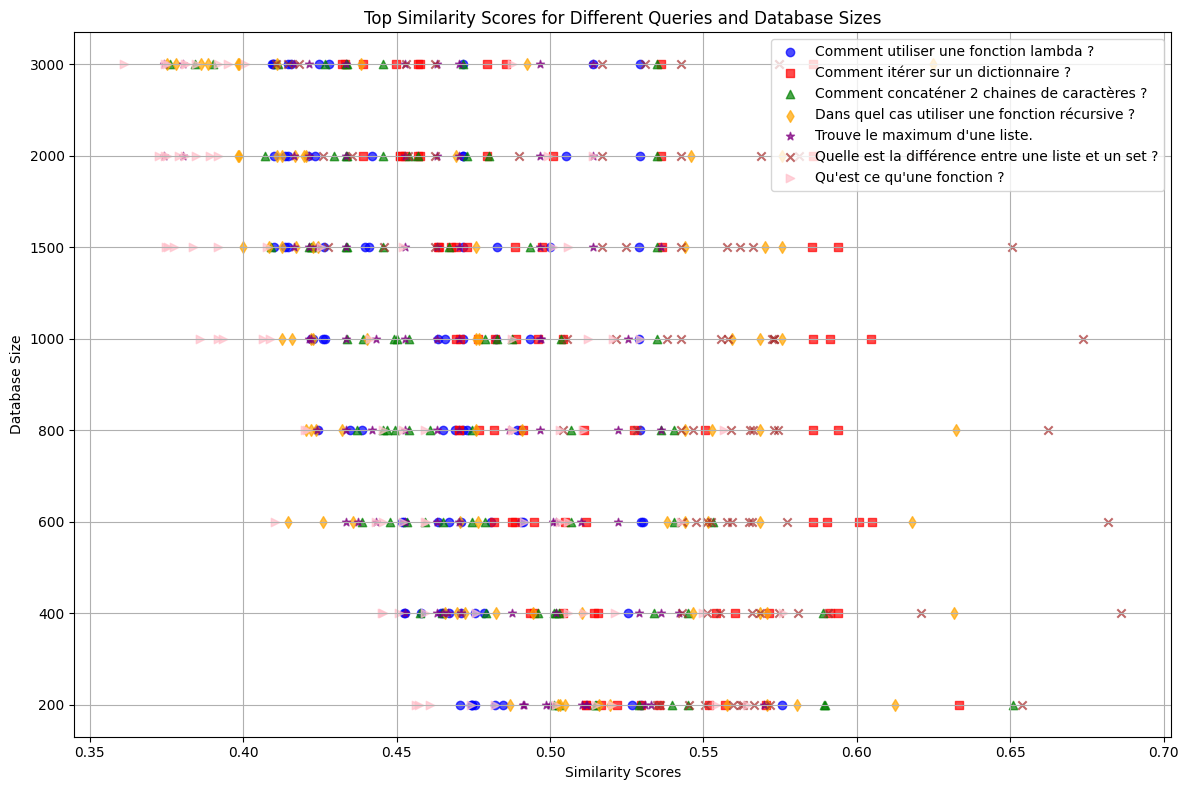

In [46]:
plot_top_similarity_scores(queries_set, databases)

Here is a plot that show the similarity score of the top 10 chunks for different chunk sizes. 

Number of requested results 6000 is greater than number of elements in index 5016, updating n_results = 5016
Number of requested results 6000 is greater than number of elements in index 2204, updating n_results = 2204
Number of requested results 6000 is greater than number of elements in index 1426, updating n_results = 1426
Number of requested results 6000 is greater than number of elements in index 1070, updating n_results = 1070
Number of requested results 6000 is greater than number of elements in index 879, updating n_results = 879
Number of requested results 6000 is greater than number of elements in index 663, updating n_results = 663
Number of requested results 6000 is greater than number of elements in index 549, updating n_results = 549
Number of requested results 6000 is greater than number of elements in index 462, updating n_results = 462
Number of requested results 6000 is greater than number of elements in index 5016, updating n_results = 5016
Number of requested results

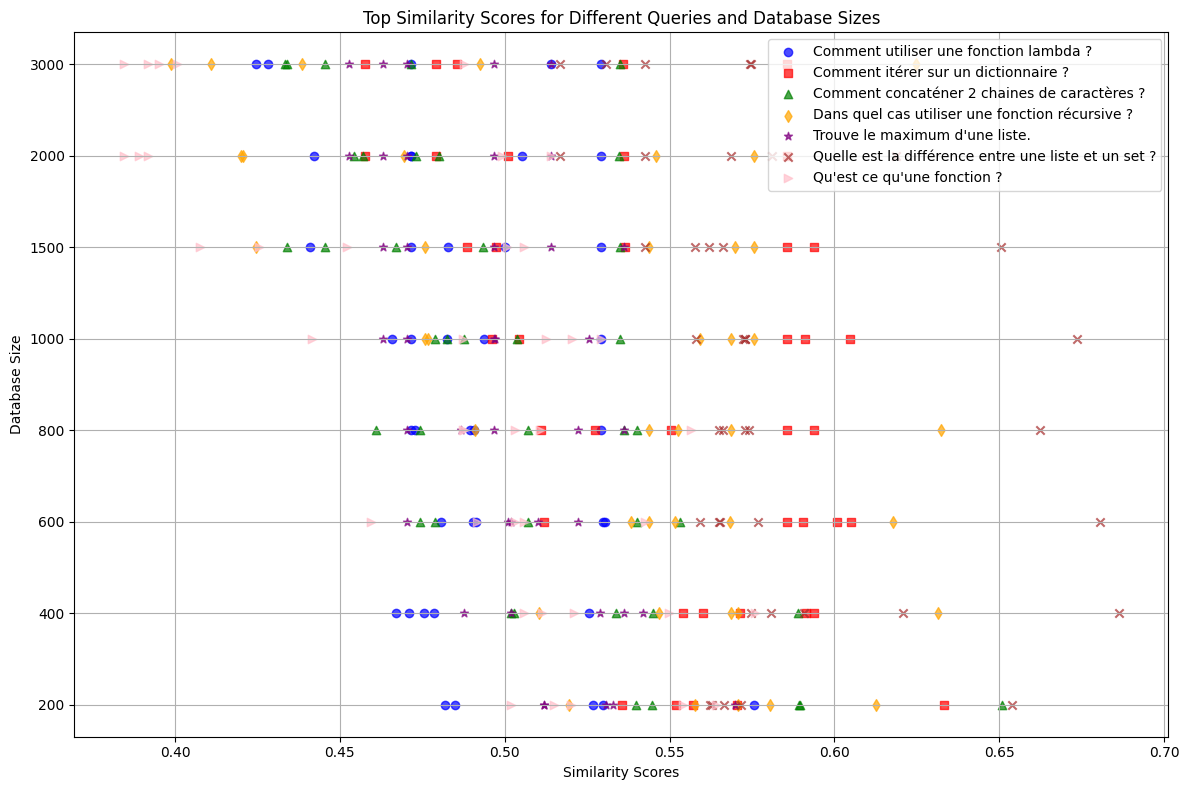

In [47]:
plot_top_similarity_scores(queries_set, databases, 5)

Here is a plot that show the similarity score of the top 5 chunks for different chunk sizes. 

Number of requested results 6000 is greater than number of elements in index 2531, updating n_results = 2531
Number of requested results 6000 is greater than number of elements in index 1993, updating n_results = 1993
Number of requested results 6000 is greater than number of elements in index 1397, updating n_results = 1397
Number of requested results 6000 is greater than number of elements in index 1075, updating n_results = 1075
Number of requested results 6000 is greater than number of elements in index 890, updating n_results = 890
Number of requested results 6000 is greater than number of elements in index 658, updating n_results = 658
Number of requested results 6000 is greater than number of elements in index 549, updating n_results = 549
Number of requested results 6000 is greater than number of elements in index 459, updating n_results = 459
Number of requested results 6000 is greater than number of elements in index 2531, updating n_results = 2531
Number of requested results

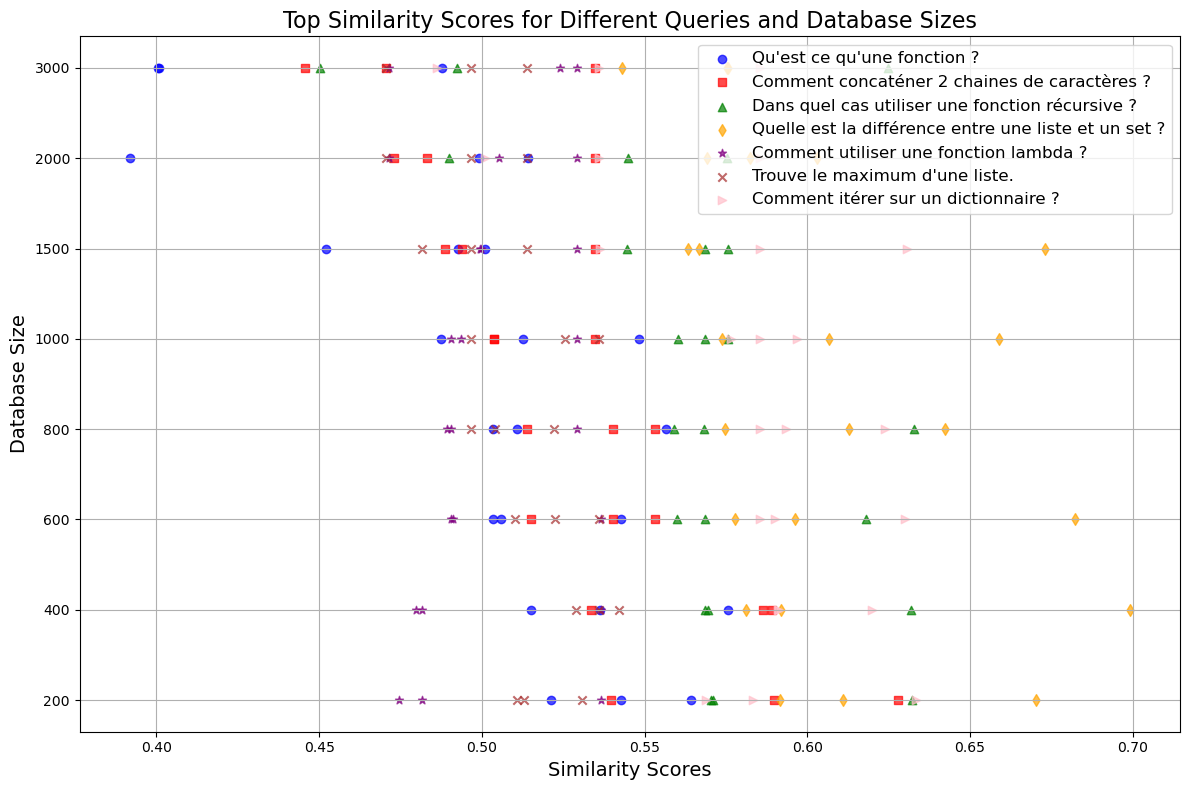

In [34]:
plot_top_similarity_scores(queries_set, databases, 3)

Here is a plot that show the similarity score of the top 3 chunks for different chunk sizes.

Number of requested results 6000 is greater than number of elements in index 5016, updating n_results = 5016
Number of requested results 6000 is greater than number of elements in index 2204, updating n_results = 2204
Number of requested results 6000 is greater than number of elements in index 1426, updating n_results = 1426
Number of requested results 6000 is greater than number of elements in index 1070, updating n_results = 1070
Number of requested results 6000 is greater than number of elements in index 879, updating n_results = 879
Number of requested results 6000 is greater than number of elements in index 663, updating n_results = 663
Number of requested results 6000 is greater than number of elements in index 549, updating n_results = 549
Number of requested results 6000 is greater than number of elements in index 462, updating n_results = 462
Number of requested results 6000 is greater than number of elements in index 5016, updating n_results = 5016
Number of requested results

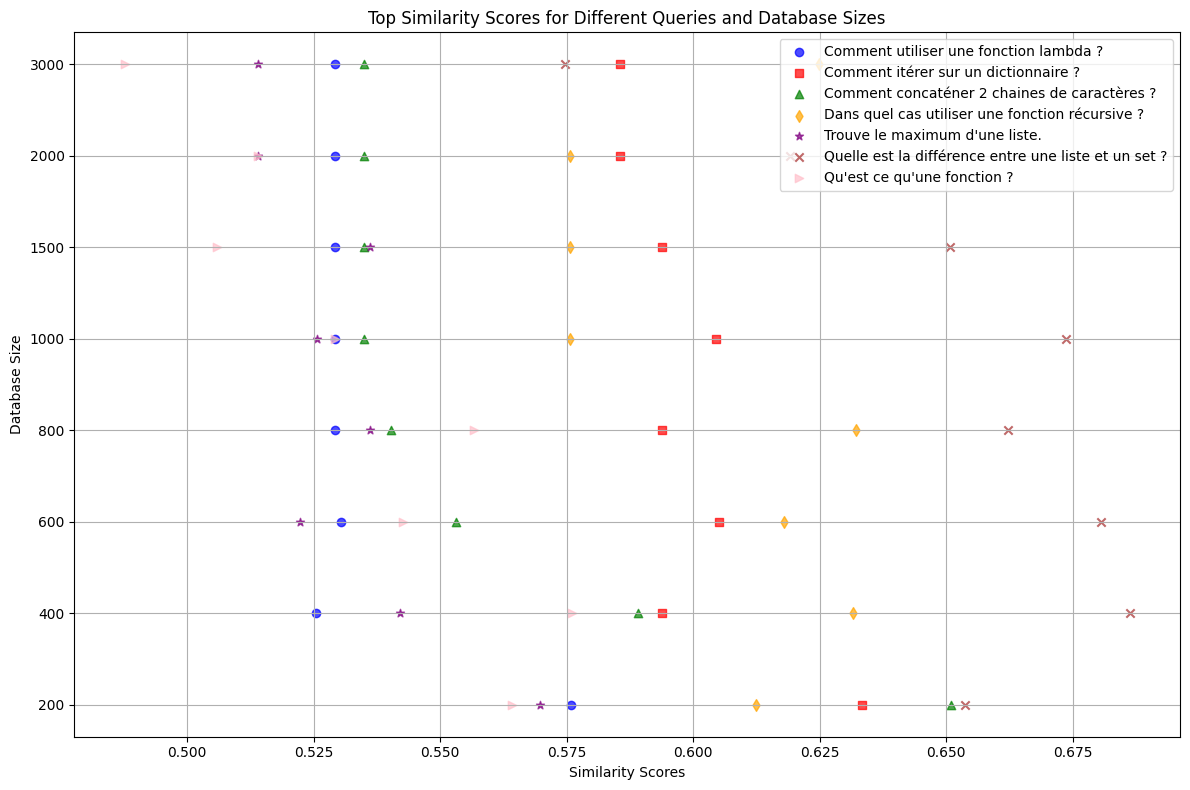

In [49]:
plot_top_similarity_scores(queries_set, databases, 1)

Now we want to study the similarity score between successive chunks. We will plot the similarity score between the first chunk and the second, the second and the third, etc. for different chunk sizes.

In [12]:
from create_database import load_documents, split_text

import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from typing import List, Dict

In [23]:
def get_chunks_from_chapter(chapter_path: str, chunk_size: int = 1000, overlap: int = 200) -> List[str]:
    # load documents from the specified directory
    documents = load_documents(chapter_path)
    chapters_details = {}
    for chapter in documents:
        chapters_details[chapter.metadata["source"].split("/")[-1].split(".")[0]] = chapter.page_content

    # Sort chapters by their keys
    chapters_details = dict(sorted(chapters_details.items()))

    # Split chaptera into chunks
    chunks = {}
    for chapter, content in chapters_details.items():
        chunks[chapter] = split_text(content, chunk_size, overlap)

    return chunks


def calculate_similarity(chunks: List[Dict[str, str]]) -> List[float]:
    """Calculate the cosine similarity between consecutive chunks.
    
    Parameters
    ----------
    chunks : list of dict
        List of chunks where each chunk is a dictionary with keys 'page_content' and 'metadata'.
    
    Returns
    -------
    similarities : list of float
        List of cosine similarities between consecutive chunks.
    """
    # Extract text content from chunks
    texts = [chunk.page_content for chunk in chunks]
    
    # Vectorize the text using TF-IDF
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    
    # Calculate cosine similarities between consecutive chunks
    similarities = []
    for i in range(len(texts) - 1):
        similarity = cosine_similarity(tfidf_matrix[i], tfidf_matrix[i + 1])[0, 0]
        similarities.append(similarity)
    
    return similarities


def plot_similarity(chapter_name: str, similarities: List[float]):
    """Plot the similarities between consecutive chunks for a chapter.
    
    Parameters
    ----------
    chapter_name : str
        The name of the chapter.
    similarities : list of float
        List of cosine similarities between consecutive chunks.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(similarities) + 1), similarities, marker='o')
    plt.title(f'Similarity between consecutive chunks in chapter {chapter_name}')
    plt.xlabel('Chunk number')
    plt.ylabel('Cosine similarity')
    plt.grid(True)
    plt.show()


def analyze_chapters(chapters: Dict[str, List[Dict[str, str]]], chunk_size: int):
    """Analyze the similarity between consecutive chunks for each chapter and plot the results.
    
    Parameters
    ----------
    chapters : dict
        Dictionary where keys are chapter names and values are lists of chunks.
    chunk_size : int
        Size of each chunk in characters.
    """
    num_chapters = len(chapters)
    cols = 4
    rows = (num_chapters + cols - 1) // cols  # Calculate number of rows needed
    
    fig, axs = plt.subplots(rows, cols, figsize=(20, 5 * rows))
    
    if num_chapters == 1:
        axs = [axs]
    else:
        axs = axs.flatten()
    
    fig.suptitle(f'Similarity between consecutive chunks (Chunk size: {chunk_size} characters)', fontsize=16)

    for i, (chapter_name, chunks) in enumerate(chapters.items()):
        similarities = calculate_similarity(chunks)
        axs[i].plot(range(1, len(similarities) + 1), similarities, marker='o')
        axs[i].set_title(f'Chapter {chapter_name}')
        axs[i].set_xlabel('Chunk number')
        axs[i].set_ylabel('Cosine similarity')
        axs[i].grid(True)
    
    # Remove any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



2024-06-02 03:18:32.835 | INFO     | create_database:load_documents:161 - Loading Markdown documents...
100%|██████████| 18/18 [00:00<00:00, 624.34it/s]
2024-06-02 03:18:32.909 | SUCCESS  | create_database:load_documents:167 - Markdown document loading complete.

2024-06-02 03:18:32.914 | INFO     | create_database:split_text:248 - Splitting the documents...
2024-06-02 03:18:32.969 | SUCCESS  | create_database:split_text:274 - Split documents into 21 chunks.

2024-06-02 03:18:32.979 | INFO     | create_database:split_text:248 - Splitting the documents...
2024-06-02 03:18:33.009 | SUCCESS  | create_database:split_text:274 - Split documents into 24 chunks.

2024-06-02 03:18:33.028 | INFO     | create_database:split_text:248 - Splitting the documents...
2024-06-02 03:18:33.069 | SUCCESS  | create_database:split_text:274 - Split documents into 36 chunks.

2024-06-02 03:18:33.078 | INFO     | create_database:split_text:248 - Splitting the documents...
2024-06-02 03:18:33.109 | SUCCESS  | cr

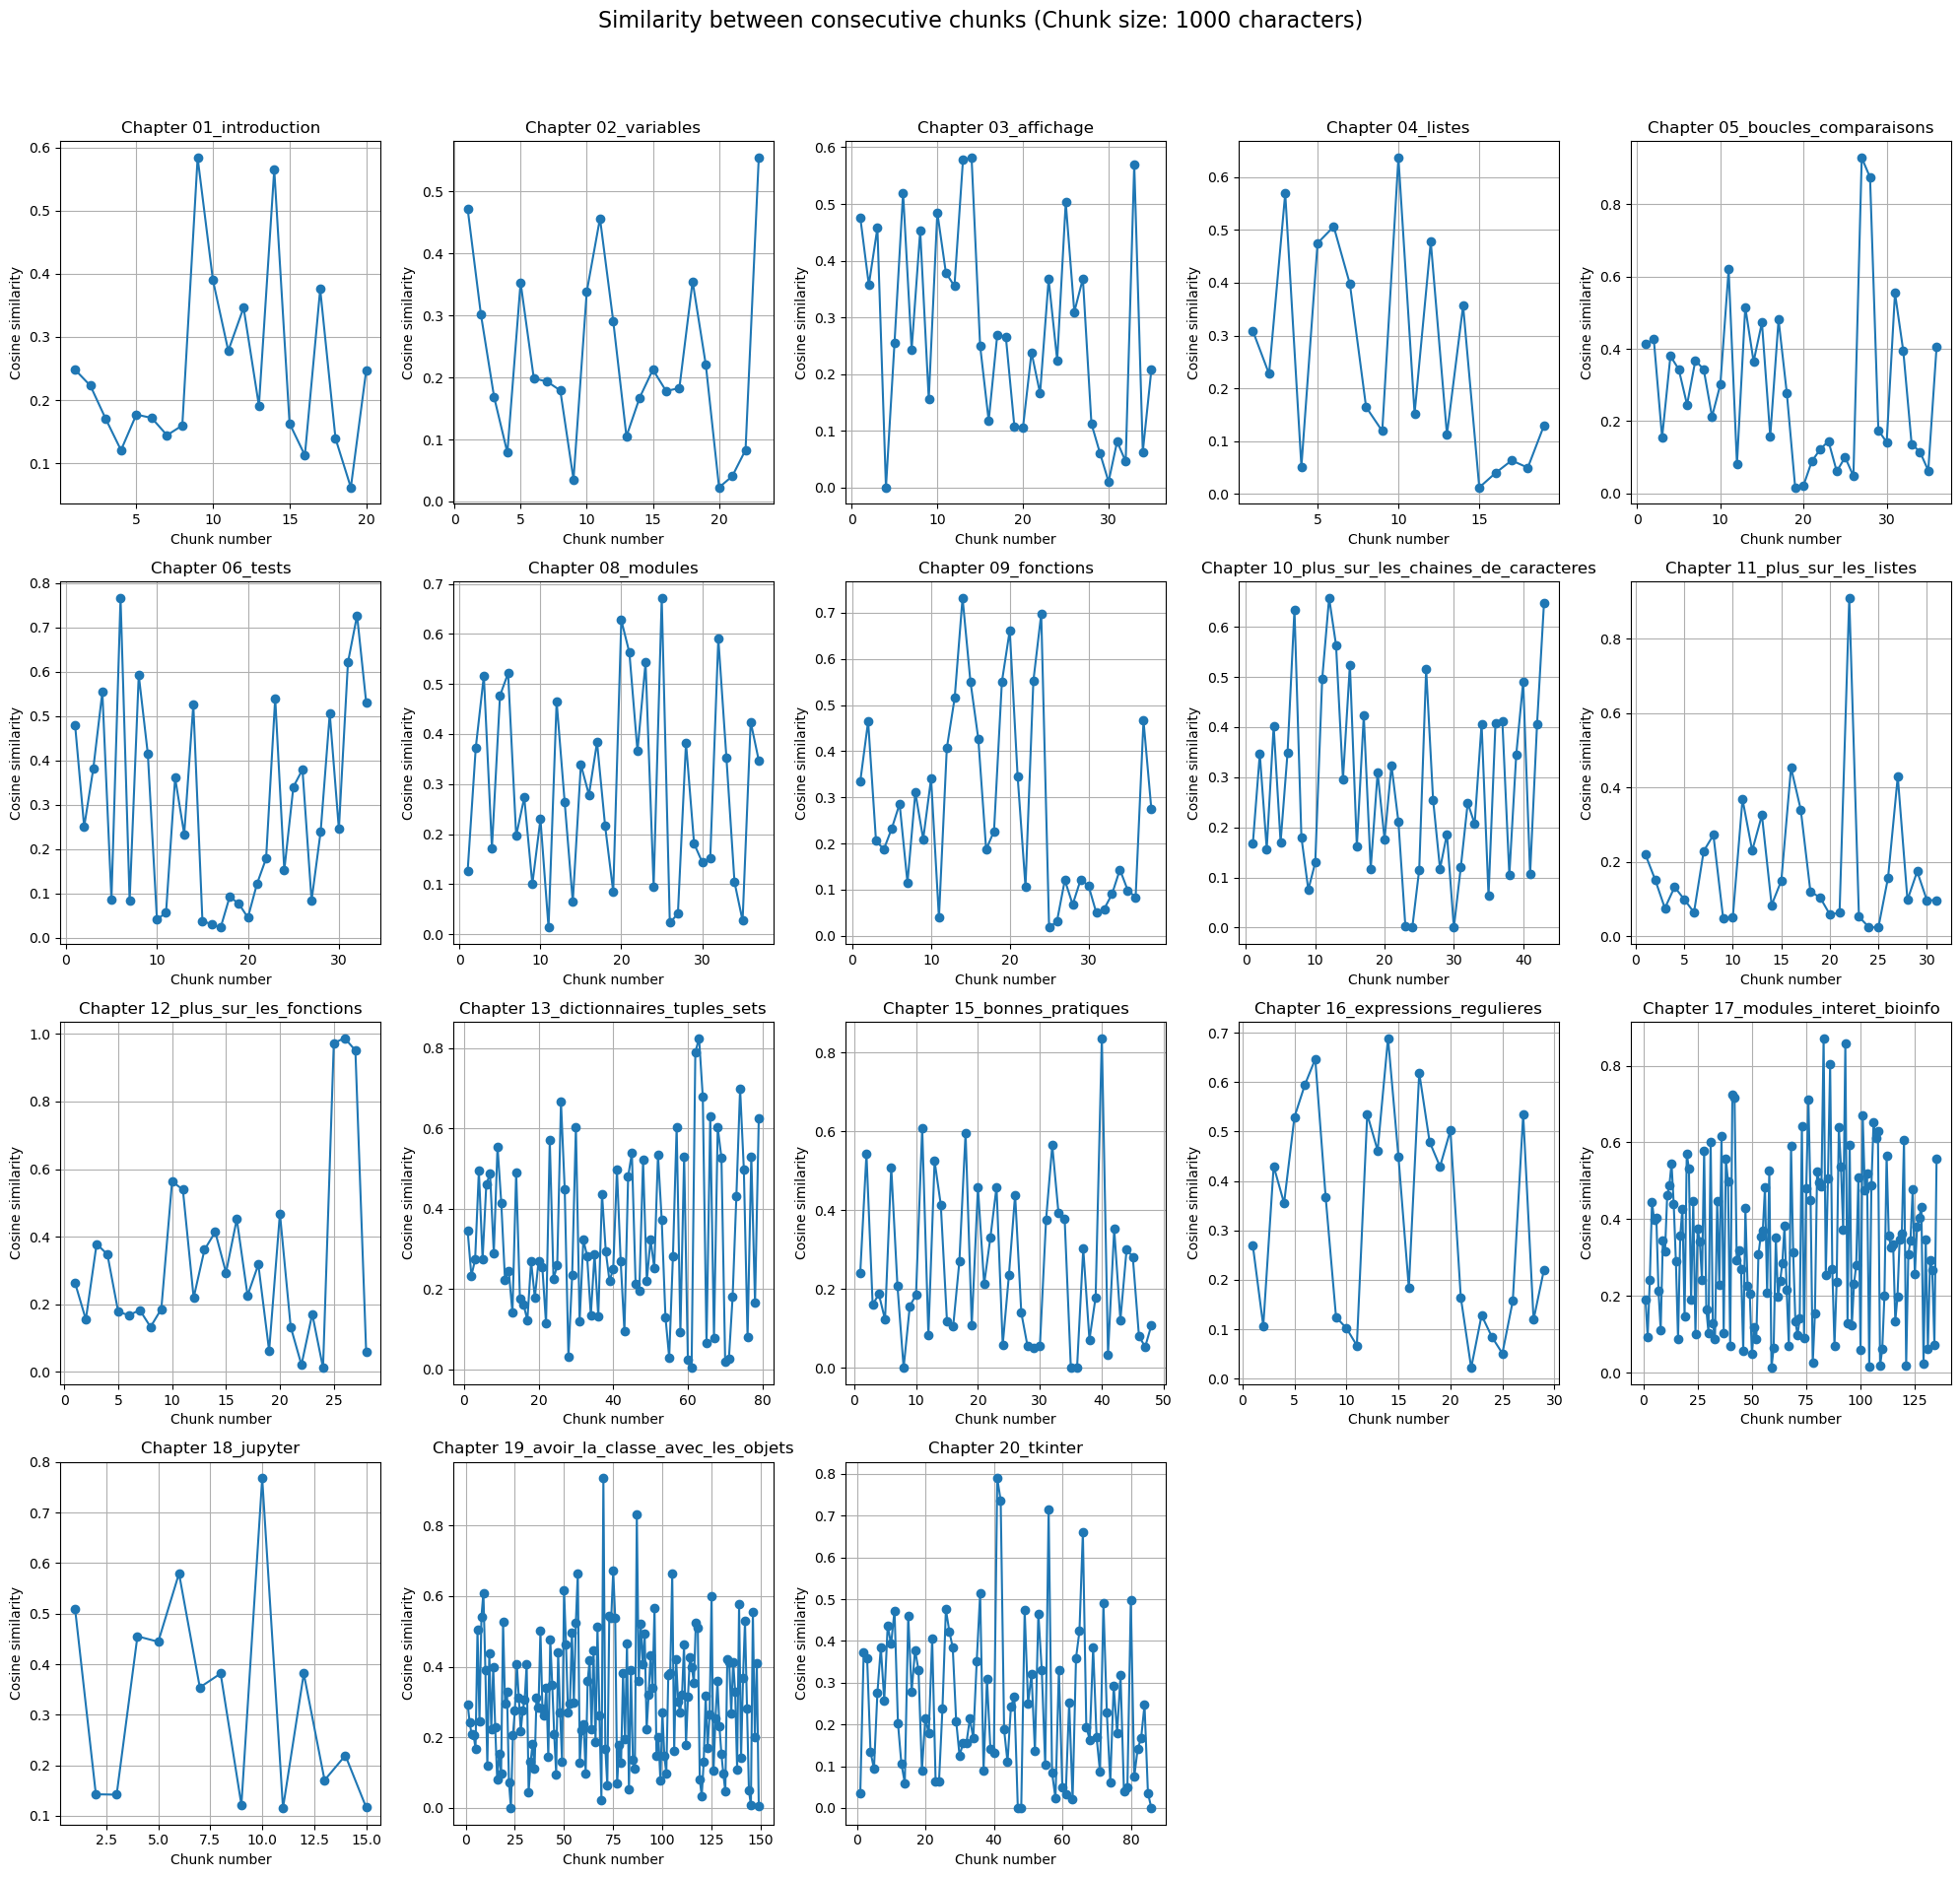

In [22]:
chunks_1000 = get_chunks_from_chapter("../data/markdown_raw", chunk_size=1000)
analyze_chapters(chunks_1000, chunk_size=1000)

2024-06-02 03:19:44.615 | INFO     | create_database:load_documents:161 - Loading Markdown documents...
100%|██████████| 18/18 [00:00<00:00, 486.40it/s]
2024-06-02 03:19:44.748 | SUCCESS  | create_database:load_documents:167 - Markdown document loading complete.

2024-06-02 03:19:44.757 | INFO     | create_database:split_text:248 - Splitting the documents...
2024-06-02 03:19:44.782 | SUCCESS  | create_database:split_text:274 - Split documents into 47 chunks.

2024-06-02 03:19:44.790 | INFO     | create_database:split_text:248 - Splitting the documents...
2024-06-02 03:19:44.814 | SUCCESS  | create_database:split_text:274 - Split documents into 46 chunks.

2024-06-02 03:19:44.827 | INFO     | create_database:split_text:248 - Splitting the documents...
2024-06-02 03:19:44.880 | SUCCESS  | create_database:split_text:274 - Split documents into 69 chunks.

2024-06-02 03:19:44.888 | INFO     | create_database:split_text:248 - Splitting the documents...
2024-06-02 03:19:44.918 | SUCCESS  | cr

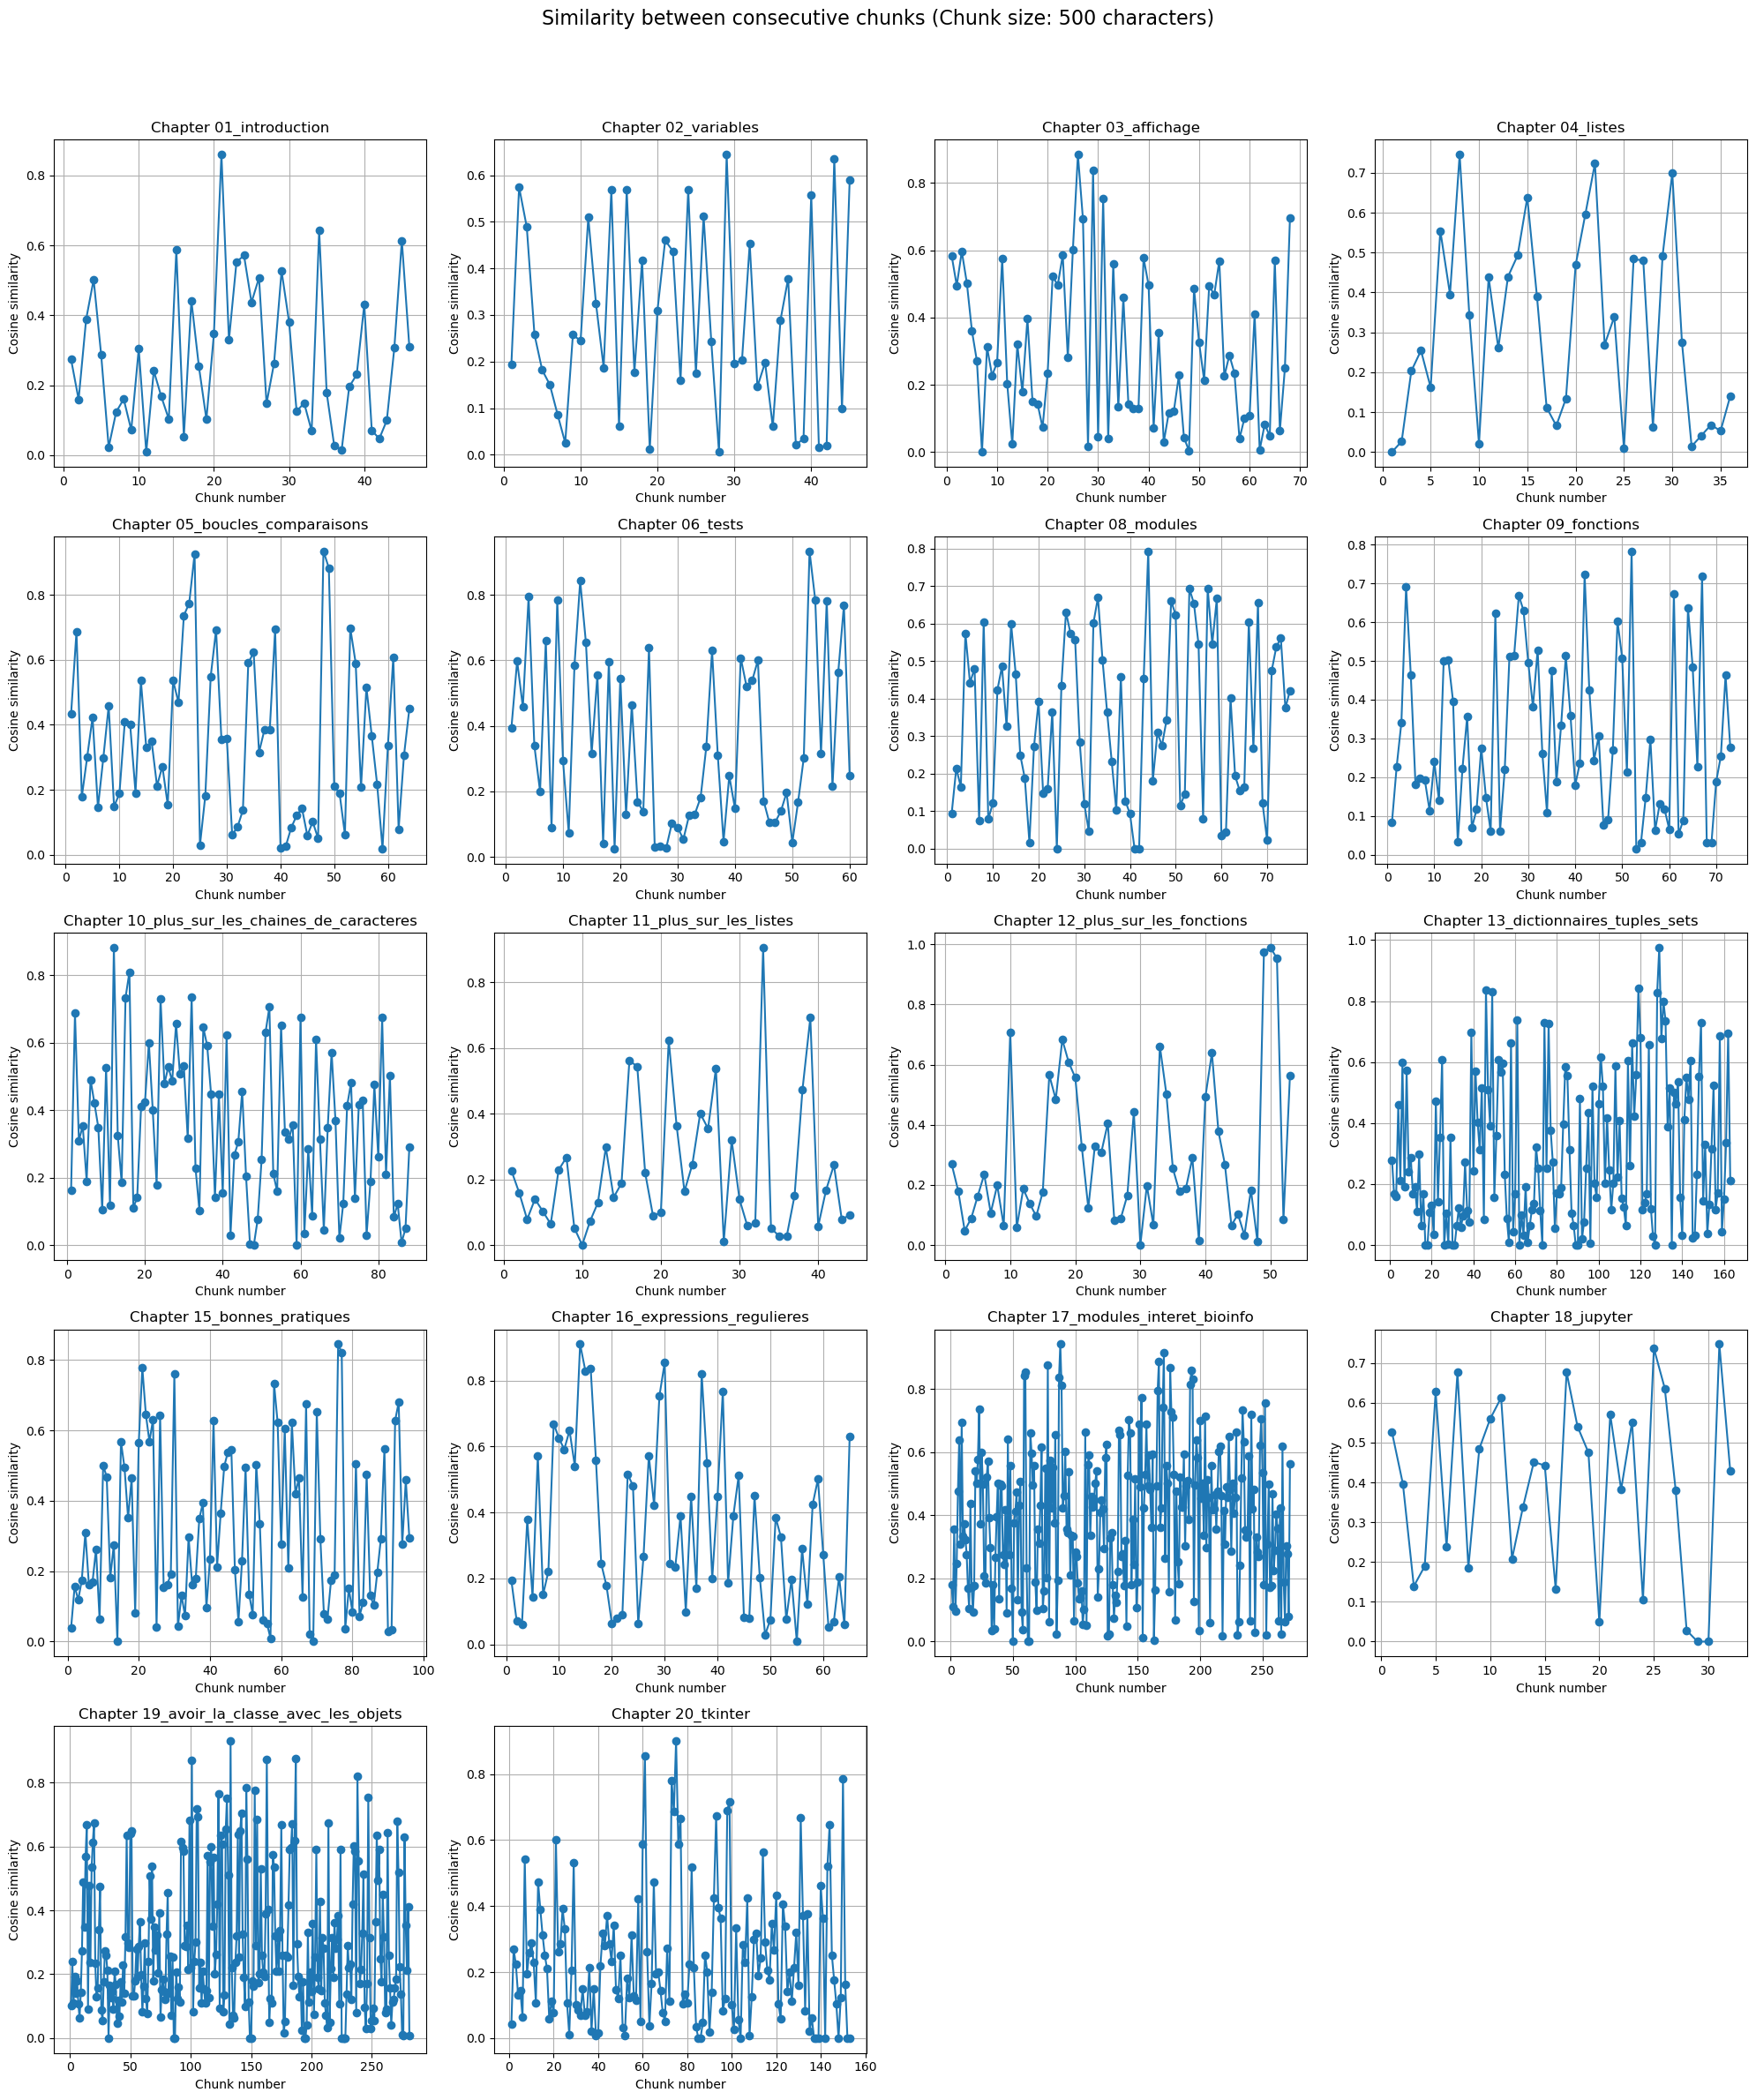

In [25]:
chunks_500 = get_chunks_from_chapter("../data/markdown_raw", chunk_size=500)
analyze_chapters(chunks_500, chunk_size=500)